In [1]:
import numpy as np
import pandas as pd

In [2]:
from datetime import datetime
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.utils import np_utils
from copy import deepcopy

Using TensorFlow backend.


In [3]:
df=pd.read_csv("ORIGINAL Police_Department_Incident_Reports__Historical_2003_to_May_2018 - Copy.csv", parse_dates=[['Date','Time']])

In [4]:
df.head()

Date_Time  IncidntNum         Category  \
0 2011-04-15 16:00:00   110308742   MISSING PERSON   
1 2009-03-26 12:28:00    90316914         WARRANTS   
2 2013-02-15 02:00:00   130132311  SECONDARY CODES   
3 2008-01-15 20:13:00    80052833   OTHER OFFENSES   
4 2007-05-26 18:10:00    70535770  SECONDARY CODES   

                                Descript DayOfWeek PdDistrict      Resolution  \
0                           FOUND PERSON    Friday    TARAVAL         LOCATED   
1                         WARRANT ARREST  Thursday   SOUTHERN  ARREST, BOOKED   
2                      DOMESTIC VIOLENCE    Friday       PARK  ARREST, BOOKED   
3  DRIVERS LICENSE, SUSPENDED OR REVOKED   Tuesday    MISSION   ARREST, CITED   
4                      DOMESTIC VIOLENCE  Saturday    MISSION  ARREST, BOOKED   

                   Address           X          Y  ...  \
0     0 Block of CRESPI DR -122.476328  37.719687  ...   
1  1000 Block of MARKET ST -122.411340  37.781271  ...   
2    CASTRO ST / MARKET ST -122.435188  37.762670  ...   
3    VALENCIA ST / 16TH ST -122.421886  37.764918  ...   
4  2800 Block of FOLSOM ST -122.413935  37.751693  ...   

  Civic Center Harm Reduction Project Boundary  \
0                                          NaN   
1                                          1.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1                           2.0                                 1.0   
2                           1.0                                 NaN   
3                           2.0                                 NaN   
4                           2.0                                 NaN   

   Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                NaN      
1                                                1.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   HSOC Zones as of 2018-06-05  OWED Public Spaces  
0                          NaN                 NaN  
1                          1.0                35.0  
2                          5.0                 NaN  
3                          3.0                 NaN  
4                          3.0                 NaN  

[5 rows x 32 columns]

In [5]:
df.shape

(2215024, 32)

In [6]:
df.isnull().sum()

Date_Time                                                     0
IncidntNum                                                    0
Category                                                      0
Descript                                                      0
DayOfWeek                                                     0
PdDistrict                                                    1
Resolution                                                    0
Address                                                       0
X                                                             0
Y                                                             0
Location                                                      0
PdId                                                          0
SF Find Neighborhoods                                      6077
Current Police Districts                                   1112
Current Supervisor Districts                                661
Analysis Neighborhoods                  

In [7]:
df['PdDistrict'].fillna(df['PdDistrict'].mode()[0], inplace = True)

In [8]:
df.isnull().any().any()

True

In [9]:
crimetype = df[['Category','Descript']].drop_duplicates()
crimetype.sort_values('Category',inplace=True)
crimetype.index = crimetype['Category']
crimetype.drop(columns=['Category'],inplace=True)
print(crimetype.shape)
crimetype

(924, 1)


Descript
Category                                                      
ARSON                                ARSON OF A POLICE VEHICLE
ARSON                           ARSON OF A COMMERCIAL BUILDING
ARSON                               ARSON OF A POLICE BUILDING
ARSON                           ARSON WITH GREAT BODILY INJURY
ARSON                                       ARSON OF A VEHICLE
...                                                        ...
WEAPON LAWS  WEAPON, DEADLY, POSSESSION OF TO VIOLATE 136.1 PC
WEAPON LAWS        WEAPON, DEADLY, EXHIBITING TO RESIST ARREST
WEAPON LAWS                                  POSS OF FIRE BOMB
WEAPON LAWS          FIREARM, POSSESSION OF WHILE WEARING MASK
WEAPON LAWS                        SNIPER SCOPE, POSSESSION OF

[924 rows x 1 columns]

In [10]:
np.unique(df.Category)

array(['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'], dtype=object)

In [11]:
df.Category=pd.Categorical(df.Category,['ARSON', 'ASSAULT', 'BAD CHECKS', 'BRIBERY', 'BURGLARY',
       'DISORDERLY CONDUCT', 'DRIVING UNDER THE INFLUENCE',
       'DRUG/NARCOTIC', 'DRUNKENNESS', 'EMBEZZLEMENT', 'EXTORTION',
       'FAMILY OFFENSES', 'FORGERY/COUNTERFEITING', 'FRAUD', 'GAMBLING',
       'KIDNAPPING', 'LARCENY/THEFT', 'LIQUOR LAWS', 'LOITERING',
       'MISSING PERSON', 'NON-CRIMINAL', 'OTHER OFFENSES',
       'PORNOGRAPHY/OBSCENE MAT', 'PROSTITUTION', 'RECOVERED VEHICLE',
       'ROBBERY', 'RUNAWAY', 'SECONDARY CODES', 'SEX OFFENSES, FORCIBLE',
       'SEX OFFENSES, NON FORCIBLE', 'STOLEN PROPERTY', 'SUICIDE',
       'SUSPICIOUS OCC', 'TREA', 'TRESPASS', 'VANDALISM', 'VEHICLE THEFT',
       'WARRANTS', 'WEAPON LAWS'])


In [12]:
df.Category=df.Category.cat.codes
df.head()

Date_Time  IncidntNum  Category  \
0 2011-04-15 16:00:00   110308742        19   
1 2009-03-26 12:28:00    90316914        37   
2 2013-02-15 02:00:00   130132311        27   
3 2008-01-15 20:13:00    80052833        21   
4 2007-05-26 18:10:00    70535770        27   

                                Descript DayOfWeek PdDistrict      Resolution  \
0                           FOUND PERSON    Friday    TARAVAL         LOCATED   
1                         WARRANT ARREST  Thursday   SOUTHERN  ARREST, BOOKED   
2                      DOMESTIC VIOLENCE    Friday       PARK  ARREST, BOOKED   
3  DRIVERS LICENSE, SUSPENDED OR REVOKED   Tuesday    MISSION   ARREST, CITED   
4                      DOMESTIC VIOLENCE  Saturday    MISSION  ARREST, BOOKED   

                   Address           X          Y  ...  \
0     0 Block of CRESPI DR -122.476328  37.719687  ...   
1  1000 Block of MARKET ST -122.411340  37.781271  ...   
2    CASTRO ST / MARKET ST -122.435188  37.762670  ...   
3    VALENCIA ST / 16TH ST -122.421886  37.764918  ...   
4  2800 Block of FOLSOM ST -122.413935  37.751693  ...   

  Civic Center Harm Reduction Project Boundary  \
0                                          NaN   
1                                          1.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1                           2.0                                 1.0   
2                           1.0                                 NaN   
3                           2.0                                 NaN   
4                           2.0                                 NaN   

   Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                NaN      
1                                                1.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   HSOC Zones as of 2018-06-05  OWED Public Spaces  
0                          NaN                 NaN  
1                          1.0                35.0  
2                          5.0                 NaN  
3                          3.0                 NaN  
4                          3.0                 NaN  

[5 rows x 32 columns]

In [13]:
df.DayOfWeek=pd.Categorical(df.DayOfWeek,['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'])


In [14]:
df.DayOfWeek=df.DayOfWeek.cat.codes
df.head()

Date_Time  IncidntNum  Category  \
0 2011-04-15 16:00:00   110308742        19   
1 2009-03-26 12:28:00    90316914        37   
2 2013-02-15 02:00:00   130132311        27   
3 2008-01-15 20:13:00    80052833        21   
4 2007-05-26 18:10:00    70535770        27   

                                Descript  DayOfWeek PdDistrict  \
0                           FOUND PERSON          4    TARAVAL   
1                         WARRANT ARREST          3   SOUTHERN   
2                      DOMESTIC VIOLENCE          4       PARK   
3  DRIVERS LICENSE, SUSPENDED OR REVOKED          1    MISSION   
4                      DOMESTIC VIOLENCE          5    MISSION   

       Resolution                  Address           X          Y  ...  \
0         LOCATED     0 Block of CRESPI DR -122.476328  37.719687  ...   
1  ARREST, BOOKED  1000 Block of MARKET ST -122.411340  37.781271  ...   
2  ARREST, BOOKED    CASTRO ST / MARKET ST -122.435188  37.762670  ...   
3   ARREST, CITED    VALENCIA ST / 16TH ST -122.421886  37.764918  ...   
4  ARREST, BOOKED  2800 Block of FOLSOM ST -122.413935  37.751693  ...   

  Civic Center Harm Reduction Project Boundary  \
0                                          NaN   
1                                          1.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1                           2.0                                 1.0   
2                           1.0                                 NaN   
3                           2.0                                 NaN   
4                           2.0                                 NaN   

   Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                NaN      
1                                                1.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   HSOC Zones as of 2018-06-05  OWED Public Spaces  
0                          NaN                 NaN  
1                          1.0                35.0  
2                          5.0                 NaN  
3                          3.0                 NaN  
4                          3.0                 NaN  

[5 rows x 32 columns]

In [15]:
np.unique(df.PdDistrict)

array(['BAYVIEW', 'CENTRAL', 'INGLESIDE', 'MISSION', 'NORTHERN', 'PARK',
       'RICHMOND', 'SOUTHERN', 'TARAVAL', 'TENDERLOIN'], dtype=object)

In [16]:
df.PdDistrict=pd.Categorical(df.PdDistrict,["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])


In [17]:
df.PdDistrict=df.PdDistrict.cat.codes
df.head()

Date_Time  IncidntNum  Category  \
0 2011-04-15 16:00:00   110308742        19   
1 2009-03-26 12:28:00    90316914        37   
2 2013-02-15 02:00:00   130132311        27   
3 2008-01-15 20:13:00    80052833        21   
4 2007-05-26 18:10:00    70535770        27   

                                Descript  DayOfWeek  PdDistrict  \
0                           FOUND PERSON          4           7   
1                         WARRANT ARREST          3           3   
2                      DOMESTIC VIOLENCE          4           2   
3  DRIVERS LICENSE, SUSPENDED OR REVOKED          1           4   
4                      DOMESTIC VIOLENCE          5           4   

       Resolution                  Address           X          Y  ...  \
0         LOCATED     0 Block of CRESPI DR -122.476328  37.719687  ...   
1  ARREST, BOOKED  1000 Block of MARKET ST -122.411340  37.781271  ...   
2  ARREST, BOOKED    CASTRO ST / MARKET ST -122.435188  37.762670  ...   
3   ARREST, CITED    VALENCIA ST / 16TH ST -122.421886  37.764918  ...   
4  ARREST, BOOKED  2800 Block of FOLSOM ST -122.413935  37.751693  ...   

  Civic Center Harm Reduction Project Boundary  \
0                                          NaN   
1                                          1.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1                           2.0                                 1.0   
2                           1.0                                 NaN   
3                           2.0                                 NaN   
4                           2.0                                 NaN   

   Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                NaN      
1                                                1.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   HSOC Zones as of 2018-06-05  OWED Public Spaces  
0                          NaN                 NaN  
1                          1.0                35.0  
2                          5.0                 NaN  
3                          3.0                 NaN  
4                          3.0                 NaN  

[5 rows x 32 columns]

In [18]:
np.unique(df.Descript)


array(['ABANDONMENT OF CHILD', 'ABORTION',
       'ACCESS CARD INFORMATION, PUBLICATION OF',
       'ACCESS CARD INFORMATION, THEFT OF', 'ACCIDENTAL BURNS',
       'ACCIDENTAL LACERATIONS', 'ACCIDENTAL SHOOTING',
       'ACTS AGAINST PUBLIC TRANSIT',
       'ADVERTISING DISTRIBUTORS PERMIT VIOLATION',
       'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF',
       'AFFIXING ADVERTISMENTS TO POLES',
       'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING',
       'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A GUN',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'AGGRAVATED ASSAULT WITH A GUN', 'AGGRAVATED ASSAULT WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'AGGRESSIVE SOLICITING',
       'AID OR HARBOR FELON', 'AIDED CASE',
       'AIDED CASE -PROPERTY FOR DESTRUCTION', 'AIDED CASE, DOG BITE',
       'AIDED CASE, INJURED PERSON', 'AIDED CASE

In [19]:
df.Descript=pd.Categorical(df.Descript,['ABANDONMENT OF CHILD', 'ABORTION',
       'ACCESS CARD INFORMATION, PUBLICATION OF',
       'ACCESS CARD INFORMATION, THEFT OF', 'ACCIDENTAL BURNS',
       'ACCIDENTAL SHOOTING', 'ACTS AGAINST PUBLIC TRANSIT',
       'ADVERTISING DISTRIBUTORS PERMIT VIOLATION',
       'AEROSOL CONTAINER; SALE, PURCHASE OR POSSESSION OF',
       'AFFIXING ADVERTISMENTS TO POLES',
       'AGGRAVATED ASSAULT OF POLICE OFFICER, SNIPING',
       'AGGRAVATED ASSAULT OF POLICE OFFICER,BODILY FORCE',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A GUN',
       'AGGRAVATED ASSAULT ON POLICE OFFICER WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH A DEADLY WEAPON',
       'AGGRAVATED ASSAULT WITH A GUN', 'AGGRAVATED ASSAULT WITH A KNIFE',
       'AGGRAVATED ASSAULT WITH BODILY FORCE', 'AGGRESSIVE SOLICITING',
       'AID OR HARBOR FELON', 'AIDED CASE',
       'AIDED CASE -PROPERTY FOR DESTRUCTION', 'AIDED CASE, DOG BITE',
       'AIDED CASE, INJURED PERSON', 'AIDED CASE, MENTAL DISTURBED',
       'AIDED CASE, SICK PERSON',
       'AMMUNITION, POSS. BY PROHIBITED PERSON', 'ANIMAL, FIGHTING',
       'ANIMAL, WITHOUT PROPER CARE OR ATTENTION',
       'ANNOY OR MOLEST CHILDREN',
       'ARMOR PENETRATING AMMUNITION, POSSESSION', 'ARSON',
       'ARSON OF A COMMERCIAL BUILDING', 'ARSON OF A POLICE BUILDING',
       'ARSON OF A POLICE VEHICLE', 'ARSON OF A VACANT BUILDING',
       'ARSON OF A VEHICLE', 'ARSON OF AN INHABITED DWELLING',
       'ARSON WITH GREAT BODILY INJURY', 'ASSAULT',
       'ASSAULT BY JUVENILE SUSPECT', 'ASSAULT BY POISONING',
       'ASSAULT BY POLICE OFFICER',
       'ASSAULT ON A POLICE OFFICER WITH A DEADLY WEAPON',
       "ASSAULT OR ATTEMPTED MURDER UPON GOV'T OFFICERS",
       'ASSAULT TO COMMIT MAYHEM OR SPECIFIC SEX OFFENSES',
       'ASSAULT TO RAPE WITH A DANGEROUS WEAPON',
       'ASSAULT TO RAPE WITH A GUN',
       'ASSAULT TO RAPE WITH A SHARP INSTRUMENT',
       'ASSAULT TO RAPE WITH BODILY FORCE',
       'ASSAULT TO ROB BANK WITH A GUN',
       'ASSAULT TO ROB ON THE STREET W/DEADLY WEAPON',
       'ASSAULT TO ROB WITH BODILY FORCE',
       'ASSAULT WITH CAUSTIC CHEMICALS',
       'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ GUN',
       'ASSAULT, AGGRAVATED, ON POLICE OFFICER, W/ SEMI AUTO',
       'ASSAULT, AGGRAVATED, W/ GUN',
       'ASSAULT, AGGRAVATED, W/ MACHINE GUN',
       'ASSAULT, AGGRAVATED, W/ SEMI AUTO', 'ATM RELATED CRIME',
       'ATTEMPTED ARSON', 'ATTEMPTED AUTO STRIP', 'ATTEMPTED EXTORTION',
       'ATTEMPTED GRAND THEFT FROM PERSON',
       'ATTEMPTED GRAND THEFT PICKPOCKET',
       'ATTEMPTED GRAND THEFT PURSESNATCH',
       'ATTEMPTED HOMICIDE BY SNIPING',
       'ATTEMPTED HOMICIDE WITH A DANGEROUS WEAPON',
       'ATTEMPTED HOMICIDE WITH A GUN', 'ATTEMPTED HOMICIDE WITH A KNIFE',
       'ATTEMPTED HOMICIDE WITH BODILY FORCE',
       'ATTEMPTED HOMICIDE WITH EXPLOSIVES',
       'ATTEMPTED KIDNAPPING, ADULT VICTIM',
       'ATTEMPTED KIDNAPPING, JUVENILE VICTIM',
       'ATTEMPTED MAYHEM WITH A DEADLY WEAPON',
       'ATTEMPTED MAYHEM WITH A GUN', 'ATTEMPTED MAYHEM WITH A KNIFE',
       'ATTEMPTED MAYHEM WITH BODILY FORCE', 'ATTEMPTED MOTORCYCLE STRIP',
       'ATTEMPTED PETTY THEFT OF PROPERTY', 'ATTEMPTED RAPE WITH A GUN',
       'ATTEMPTED RAPE, ARMED WITH A DANGEROUS WEAPON',
       'ATTEMPTED RAPE, ARMED WITH A SHARP INSTRUMENT',
       'ATTEMPTED RAPE, BODILY FORCE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH A GUN',
       'ATTEMPTED ROBBERY CHAIN STORE WITH A KNIFE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH BODILY FORCE',
       'ATTEMPTED ROBBERY CHAIN STORE WITH DEADLY WEAPON',
       'ATTEMPTED ROBBERY COMM. ESTAB. WITH BODILY FORCE',
       'ATTEMPTED ROBBERY COMM. ESTAB. WITH DEADLY WEAPON',
       'ATTEMPTED ROBBERY COMM. ESTABLISHMENT W/KNIFE',
       'ATTEMPTED ROBBERY COMM. ESTABLISHMENT WITH A GUN',
       'ATTEMPTED ROBBERY OF A BANK WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY OF A BANK WITH A GUN',
       'ATTEMPTED ROBBERY OF A BANK WITH A KNIFE',
       'ATTEMPTED ROBBERY OF A BANK WITH BODILY FORCE',
       'ATTEMPTED ROBBERY ON THE STREET W/DEADLY WEAPON',
       'ATTEMPTED ROBBERY ON THE STREET WITH A GUN',
       'ATTEMPTED ROBBERY ON THE STREET WITH A KNIFE',
       'ATTEMPTED ROBBERY ON THE STREET WITH BODILY FORCE',
       'ATTEMPTED ROBBERY RESIDENCE WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY RESIDENCE WITH A GUN',
       'ATTEMPTED ROBBERY RESIDENCE WITH A KNIFE',
       'ATTEMPTED ROBBERY RESIDENCE WITH BODILY FORCE',
       'ATTEMPTED ROBBERY SERVICE STATION W/BODILY FORCE',
       'ATTEMPTED ROBBERY SERVICE STATION W/DEADLY WEAPON',
       'ATTEMPTED ROBBERY SERVICE STATION WITH A GUN',
       'ATTEMPTED ROBBERY SERVICE STATION WITH A KNIFE',
       'ATTEMPTED ROBBERY WITH A DEADLY WEAPON',
       'ATTEMPTED ROBBERY WITH A GUN', 'ATTEMPTED ROBBERY WITH A KNIFE',
       'ATTEMPTED ROBBERY WITH BODILY FORCE', 'ATTEMPTED SHOPLIFTING',
       'ATTEMPTED SIMPLE ASSAULT', 'ATTEMPTED STOLEN VEHICLE',
       'ATTEMPTED SUICIDE', 'ATTEMPTED SUICIDE BY ASPHYXIATION',
       'ATTEMPTED SUICIDE BY DROWNING', 'ATTEMPTED SUICIDE BY FIRE',
       'ATTEMPTED SUICIDE BY FIREARMS', 'ATTEMPTED SUICIDE BY INGESTION',
       'ATTEMPTED SUICIDE BY JUMPING', 'ATTEMPTED SUICIDE BY LACERATION',
       'ATTEMPTED SUICIDE BY STRANGULATION',
       'ATTEMPTED THEFT COIN OPERATED MACHINE',
       'ATTEMPTED THEFT FROM A BUILDING',
       'ATTEMPTED THEFT FROM LOCKED VEHICLE',
       'ATTEMPTED THEFT FROM UNLOCKED VEHICLE',
       'ATTEMPTED THEFT OF A BICYCLE', 'ATTEMPTED THEFT PHONE BOOTH',
       'AUDIOVISUAL (VIDEO OR SOUND) RECORDINGS, UNAUTHORIZED',
       'AUTO IMPOUNDED', 'AUTO, GRAND THEFT OF',
       'BALLOONS, ELECTRICALLY CONDUCTIVE',
       'BATHROOM HOLE, LOOKING THROUGH', 'BATTERY',
       'BATTERY BY JUVENILE SUSPECT', 'BATTERY DURING LABOR DISPUTE',
       'BATTERY OF A POLICE OFFICER', 'BATTERY WITH SERIOUS INJURIES',
       'BATTERY, FORMER SPOUSE OR DATING RELATIONSHIP', 'BEGGING',
       'BEYOND PARENTAL CONTROL',
       'BIGAMY, INCEST, AND THE CRIME AGAINST NATURE (GENERAL)',
       'BOMBING OF POLICE BUILDING', 'BOOKMAKING',
       'BRIBERY OF EXECUTIVE OFFICER', 'BRIBERY OF WITNESSES',
       'BURGLARY OF APARTMENT HOUSE, ATT FORCIBLE ENTRY',
       'BURGLARY OF APARTMENT HOUSE, FORCIBLE ENTRY',
       'BURGLARY OF APARTMENT HOUSE, UNLAWFUL ENTRY',
       'BURGLARY OF FLAT, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF FLAT, FORCIBLE ENTRY',
       'BURGLARY OF FLAT, UNLAWFUL ENTRY',
       'BURGLARY OF HOTEL ROOM, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF HOTEL ROOM, FORCIBLE ENTRY',
       'BURGLARY OF HOTEL ROOM, UNLAWFUL ENTRY',
       'BURGLARY OF RESIDENCE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF RESIDENCE, FORCIBLE ENTRY',
       'BURGLARY OF RESIDENCE, UNLAWFUL ENTRY',
       'BURGLARY OF STORE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF STORE, FORCIBLE ENTRY',
       'BURGLARY OF STORE, UNLAWFUL ENTRY',
       'BURGLARY OF WAREHOUSE, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY OF WAREHOUSE, FORCIBLE ENTRY',
       'BURGLARY OF WAREHOUSE, UNLAWFUL ENTRY',
       'BURGLARY, ATTEMPTED FORCIBLE ENTRY', 'BURGLARY, FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, ATTEMPTED FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, FORCIBLE ENTRY',
       'BURGLARY, HOT PROWL, UNLAWFUL ENTRY', 'BURGLARY, UNLAWFUL ENTRY',
       'BURGLARY, VEHICLE (ARREST MADE)',
       'BURGLARY, VEHICLE, ATT. (ARREST MADE)',
       'BURGLARY,APT UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,APT UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,APT UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,BLDG. UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,FLAT UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,FLAT UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,FLAT UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,HOTEL UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,HOTEL UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,RESIDENCE UNDER CONSTRT, ATT. FORCIBLE',
       'BURGLARY,RESIDENCE UNDER CONSTRT, FORCIBLE ENTRY',
       'BURGLARY,RESIDENCE UNDER CONSTRT, UNLAWFUL ENTRY',
       'BURGLARY,STORE UNDER CONSTRUCTION, ATT. FORCIBLE',
       'BURGLARY,STORE UNDER CONSTRUCTION, FORCIBLE ENTRY',
       'BURGLARY,STORE UNDER CONSTRUCTION, UNLAWFUL ENTRY',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, ATT. FORCIBLE',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, FORCIBLE ENTRY',
       'BURGLARY,WAREHOUSE UNDER CONSTRT, UNLAWFUL ENTRY',
       'CABLE TV CONNECTION OR DECODING DEVICE, UNAUTHORIZED',
       'CARJACKING WITH A DANGEROUS WEAPON', 'CARJACKING WITH A GUN',
       'CARJACKING WITH A KNIFE', 'CARJACKING WITH BODILY FORCE',
       'CARRYING A CONCEALED WEAPON',
       'CARRYING OF CONCEALED WEAPON BY CONVICTED FELON', 'CASE CLOSURE',
       'CASH DISPENSING MACHINES (ATM), LOITERING PROHIBI',
       'CELLULAR OR CORDLESS PHONE COMMUNICATIONS, INTERCEPTING',
       'CHECKS OR LEGAL INSTRUMENTS, UTTERING FORGED',
       'CHECKS, FORGERY (FELONY)', 'CHECKS, FORGERY (MISDEMEANOR)',
       'CHECKS, MAKE OR PASS FICTITIOUS',
       'CHECKS, NON-SUFFICIENT FUNDS (FELONY)',
       'CHECKS, NON-SUFFICIENT FUNDS (MISDEMEANOR)',
       'CHECKS, POSSESSION WITH INTENT TO PASS', 'CHILD ABUSE (PHYSICAL)',
       'CHILD ABUSE SEXUAL', 'CHILD ABUSE, EXPLOITATION',
       'CHILD ABUSE, PORNOGRAPHY', 'CHILD STEALING',
       'CHILD, INFLICTING INJURY RESULTING IN TRAUMATIC CONDITION',
       'CHILDREN, ABANDONMENT & NEGLECT OF (GENERAL)',
       'CITIZENSHIP DOCUMENT, USING FALSE',
       'CITIZENSHIP OR ALIEN REGISTRATION, MAKING FALSE DOCUMENT',
       'CIVIL RIGHTS, INCL. INJURY, THREAT, OR DAMAGE (HATE CRIMES)',
       'CIVIL SIDEWALKS, BOOKING', 'CIVIL SIDEWALKS, CITATION',
       'CIVIL SIDEWALKS, VIOLATION', 'CIVIL SIDEWALKS, WARNING',
       'COMMISSION OF FELONY WHILE ARMED', 'COMMITTING PUBLIC NUISANCE',
       'COMPUTER SYSTEM, ACCESSING, COPYING, OR DAMAGING',
       'CONCEAL CRIME OR WITHHOLD EVIDENCE, ACCEPTING PAYMENT TO',
       'CONCEALMENT/REMOVAL OF CHILD WITHOUT CONSENT', 'CONSPIRACY',
       'CONSUMING ALCOHOL IN PUBLIC VIEW',
       'CONTRIBUTING TO THE DELINQUENCY OF MINOR',
       'CONTROLLED SUBSTANCE VIOLATION, LOITERING FOR',
       'COUNTERFEITING, COINS OR NOTES', 'COUNTERFEITING, PLATES OR DIES',
       'COUNTERFEITING, POSSESSION COINS OR NOTES', 'COURTESY REPORT',
       'CREDIT CARD, INCOMPLETE OR COUNTERFEIT',
       'CREDIT CARD, THEFT BY USE OF', 'CREDIT CARD, THEFT OF',
       'CRIMES AGAINST REVENUE & PROPERTY OF STATE', 'CRUELTY TO ANIMALS',
       'CURFEW VIOLATION', 'DAMAGE TO FIRE ALARM APPARATUS',
       'DAMAGE TO MAIL BOX', 'DAMAGE TO PARKING METERS',
       'DAMAGE/DESTRUCTION OF MAIL', 'DANGER OF LEADING IMMORAL LIFE',
       'DEATH REPORT, CAUSE UNKNOWN', 'DEATH REPORT, IN CUSTODY',
       'DEATH REPORT, NATURAL CAUSES', 'DEATH, ACCIDENTAL',
       'DEATH, NON-MANSLAUGHTER AUTO ACCIDENT', 'DEFRAUDING AN INNKEEPER',
       'DEFRAUDING OF VEHICLE REPAIRMAN', 'DEFRAUDING TAXI DRIVER',
       'DEMONSTRATION, VIDEO EVIDENCE, MISC. INVESTIGATION',
       'DESERTION OF CHILD', 'DESTROYING JAIL PROPERTY-$200 OR UNDER',
       'DESTRUCTION OF PROPERTY WITH EXPLOSIVES',
       'DESTRUCTIVE DEVICE, POSSESSION OF MATERIALS',
       'DISCHARGE FIREARM AT AN INHABITED DWELLING',
       'DISCHARGE FIREARM WITHIN CITY LIMITS',
       'DISCHARGING IN GROSSLY NEGLIGENT MANNER',
       'DISCHARGING OFFENSIVE OR INJURIOUS SUBSTANCE IN PUBLIC AREA',
       'DISORDERLY HOUSE, KEEPING',
       'DISPLAY & SALE OF SPRAY PAINT & MARKER PENS',
       'DISRUPTS SCHOOL ACTIVITIES', 'DISSUADING WITNESS, VICTIM',
       'DISTURBING RELIGIOUS MEETINGS', 'DISTURBING THE PEACE',
       'DISTURBING THE PEACE, COMMOTION',
       'DISTURBING THE PEACE, FIGHTING', 'DISTURBING THE PEACE, SWEARING',
       'DOG OR CAT, ABANDONMENT OF', 'DOG, BARKING',
       'DOG, FIGHTING;  OWNING, FIGHTING, OR ATTENDING FIGHT',
       'DOG, STRAY OR VICIOUS', 'DOMESTIC VIOLENCE',
       'DRIVERS LICENSE, SUSPENDED OR REVOKED',
       'DRIVES VEHICLE ALONG TRACK OF RAILROAD',
       'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL',
       'DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL, W/INJURY',
       'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS',
       'DRIVING WHILE UNDER THE INFLUENCE OF DRUGS, W/INJURY',
       'DRIVING, DRAG RACING', 'DRIVING, RECKLESS, WITH INJURY',
       'DRUG LAB APPARATUS, POSSESSION',
       'DRUG OFFENDER, PRESENCE  NEAR SCHOOL GROUNDS',
       'DUMPING OF OFFENSIVE MATTER',
       'EAVESDROPPING DEVICES, SALE OR USE',
       'ELDER ADULT OR DEPENDENT ABUSE (NOT EMBEZZLEMENT OR THEFT)',
       'ELECTRICAL  OR GAS LINES, INTERFERING WITH', 'EMBEZZLED VEHICLE',
       'EMBEZZLEMENT (GENERAL)',
       'EMBEZZLEMENT FROM DEPENDENT OR ELDER ADULT BY CARETAKER',
       'EMBEZZLEMENT, GRAND THEFT',
       'EMBEZZLEMENT, GRAND THEFT BY BROOKERS/AGENTS',
       'EMBEZZLEMENT, GRAND THEFT BY COLLECTOR',
       'EMBEZZLEMENT, GRAND THEFT BY EMPLOYEE',
       'EMBEZZLEMENT, GRAND THEFT BY PROPERTY CARRIER',
       'EMBEZZLEMENT, GRAND THEFT LEASED PROPERTY',
       'EMBEZZLEMENT, GRAND THEFT PRIVATE PROPERTY',
       'EMBEZZLEMENT, GRAND THEFT PUBLIC/PRIVATE OFFICIAL',
       'EMBEZZLEMENT, PETTY THEFT',
       'EMBEZZLEMENT, PETTY THEFT BY BROOKERS/AGENTS',
       'EMBEZZLEMENT, PETTY THEFT BY EMPLOYEE',
       'EMBEZZLEMENT, PETTY THEFT OF LEASED PROPERTY',
       'EMBEZZLEMENT, PETTY THEFT PRIVATE PROPERTY',
       'EMBEZZLEMENT, PETTY THEFT PUBLIC/PRIVATE OFFICIAL',
       'ENCOUNTER STUDIO ORDINANCE VIOLATION',
       'ENCOURAGE MINOR TO USE AMPHETAMINE',
       'ENCOURAGE MINOR TO USE BARBITUATES',
       'ENCOURAGE MINOR TO USE CONTROLLED SUBSTANCE',
       'ENCOURAGING MINOR TO USE COCAINE',
       'ENCOURAGING MINOR TO USE MARIJUANA', 'ENGAGING IN LEWD ACT',
       'ENGAGING IN LEWD CONDUCT - PROSTITUTION RELATED',
       'ENROUTE TO ADULT AUTHORITY',
       'ENROUTE TO DEPARTMENT OF CORRECTIONS',
       'ENROUTE TO OUTSIDE JURISDICTION', 'ENROUTE TO PAROLE OFFICER',
       'ENROUTE TO PROBATION OFFICER', 'ENROUTE TO U.S. MARSHALL',
       'ESCAPE FROM HOSPITAL WITH FORCE', 'ESCAPE FROM JAIL',
       'ESCAPE OF PRISONER WHILE HOSPITALIZED',
       'ESCAPE OR ASSISTING ESCAPE', 'ESCAPEE, JUVENILE', 'ESCAPES',
       'EVADING A POLICE OFFICER RECKLESSLY',
       'EVADING A POLICE OFFICER, INJURY OR DEATH',
       'EVADING A POLICE VEHICLE OR BICYCLE',
       'EVADING PAYMENT OF RAILROAD FARE',
       'EXHIBITING DEADLY WEAPON IN A THREATING MANNER', 'EXTORTION',
       'FAILURE TO HEED RED LIGHT AND SIREN',
       'FAILURE TO PROVIDE FOR CHILD', 'FAILURE TO PROVIDE FOR PARENTS',
       'FAILURE TO REGISTER AS NARCOTICS ADDICT',
       'FAILURE TO REGISTER AS SEX OFFENDER',
       'FALSE CLAIMS, PRESENTING TO GOVERNMENT',
       'FALSE EVIDENCE OF AGE BY MINOR',
       'FALSE EVIDENCE OF VEHICLE REGISTRATION', 'FALSE FIRE ALARM',
       'FALSE ID TO PEACE OFFICER', 'FALSE IMPRISONMENT',
       'FALSE PERSONATION',
       'FALSE PERSONATION AND CHEAT CRIMES (GENERAL)',
       'FALSE PERSONATION TO RECEIVE MONEY OR PROPERTY',
       'FALSE PRETENSES, GRAND THEFT', 'FALSE PRETENSES, PETTY THEFT',
       'FALSE REPORT OF BOMB', 'FALSE REPORT OF CRIME',
       'FALSE REPORT OF EMERGENCY', 'FALSE REPORT OF POLICE MISCONDUCT',
       'FALSIFICATION OF MEDICAL RECORDS',
       'FALSIFYING JUDICIAL & PUBLIC RECORDS & DOCUMENTS',
       'FINANCIAL STATEMENTS, FALSE', 'FIRE REPORT',
       'FIRE, UNLAWFULLY CAUSING', 'FIREARM POSSESSION IN SCHOOL ZONE',
       'FIREARM WITH ALTERED IDENTIFICATION',
       'FIREARM, ARMED WHILE POSSESSING CONTROLLED SUBSTANCE',
       'FIREARM, CARRYING LOADED WITH INTENT TO COMMIT FELONY',
       'FIREARM, DISCHARGING AT OCCUPIED BLDG, VEHICLE, OR AIRCRAFT',
       'FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE',
       'FIREARM, NEGLIGENT DISCHARGE',
       'FIREARM, POSSESSION OF WHILE WEARING MASK',
       'FIREARM,\xa0DISCHARGING IN GROSSLY NEGLIGENT MANNER',
       'FIREARMS, SEIZING AT SCENE OF DV',
       'FIREWORKS, THROW AT PERSON OR DISCHARGE IN CROWD',
       'FLAMMABLE OR EXPLOSIVE DEVICE, POSSESSION',
       'FOOD STAMPS, MISUSE OF', 'FOOD STAMPS, UNLAWFUL USE BY RETAILER',
       'FORCIBLE RAPE, ARMED WITH A DANGEROUS WEAPON',
       'FORCIBLE RAPE, ARMED WITH A GUN',
       'FORCIBLE RAPE, ARMED WITH A SHARP INSTRUMENT',
       'FORCIBLE RAPE, BODILY FORCE', 'FORGE OR ALTER PRESCRIPTION',
       'FORGERY & COUNTERFEITING (GENERAL)', 'FORGERY, CREDIT CARD',
       'FORGERY, DRIVERS LICENSE OR ID-CARD',
       'FORGERY, FALSE ENTRIES IN RECORDS OR RETURNS',
       'FORGERY, GOVERNMENT OR CORPORATE SEALS', 'FORGERY, NOTES',
       'FORGERY, POSSESSION DRIVERS LICENSE OR ID-CARD',
       'FORTUNE TELLING', 'FOUND PERSON', 'FOUND PROPERTY',
       'FRAUDULENT AUCTION', 'FRAUDULENT CREDIT APPLICATION',
       'FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR PROPERTY',
       'FRAUDULENT USE OF AUTOMATED TELLER CARD', 'FURNISHING MARIJUANA',
       'GAMBLING', 'GAMING & HORSE RACING (GENERAL)', 'GANG ACTIVITY',
       'GRAFFITI ON GOVERNMENT VEHICLES OR PUBLIC TRANSPORTATION',
       'GRAND THEFT AUTO STRIP', 'GRAND THEFT BICYCLE',
       'GRAND THEFT BY PROSTITUTE', 'GRAND THEFT COIN OPERATED MACHINE',
       'GRAND THEFT FROM A BUILDING', 'GRAND THEFT FROM LOCKED AUTO',
       'GRAND THEFT FROM PERSON', 'GRAND THEFT FROM UNLOCKED AUTO',
       'GRAND THEFT MOTORCYCLE STRIP', 'GRAND THEFT OF PROPERTY',
       'GRAND THEFT PHONE BOOTH', 'GRAND THEFT PICKPOCKET',
       'GRAND THEFT PURSESNATCH', 'GRAND THEFT SHOPLIFTING',
       'GUIDE DOG, INTERFERING WITH', 'HABITUAL TRUANT',
       "HARASSING CHILD OR WARD BECAUSE OF PERSON'S EMPLOYMENT",
       'HARASSING PHONE CALLS',
       'HAZARDOUS MATERIALS,  DUMP ANY SUBSTANCE INTO WATER',
       'HAZARDOUS MATERIALS, DUMP OIL INTO SEWERS',
       'HAZARDOUS MATERIALS, DUMPING IN UNAUTHORIZED LOCATION',
       'HAZARDOUS MATERIALS, DUMPING IN UNAUTHORIZED LOCATN',
       'HAZARDOUS MATERIALS, FAILURE TO COMPLY W/REGULATIONS',
       'HAZARDOUS MATERIALS, SPILL LOAD',
       'HAZARDOUS MATERIALS, SPILL ON ROADWAY',
       'HAZARDOUS SUBSTANCES, DEPOSITING', 'HEATING VIOLATION  APT/HOTEL',
       'HUMAN TRAFFICKING', 'HYPODERMIC NEEDLE OR SYRINGE, POSSESSION',
       'IDENTIFICATION, GOVERNMENT, POSSESS, MAKE OR SELL FALSE',
       'ILLEGAL CHARITABLE SOLICITATIONS',
       'ILLEGAL TRANSPORTAION OF EXPLOSIVES',
       'IMMORAL ACTS OR DRUNK IN PRESENCE OF CHILD',
       'IMPERSONATING A POLICE OFFICER',
       'IMPERSONATING PUBLIC UTILITY MEMBER', 'IMPOUNDED VEHICLE',
       'INCEST', 'INCIDENT ON SCHOOL GROUNDS', 'INCITING TO RIOT',
       'INDECENT EXPOSURE', 'INDECENT EXPOSURE (JUVENILE VICTIM)',
       'INDECENT EXPOSURE - PROSTITUTION RELATED',
       'INDECENT EXPOSURE WITH PRIOR CONVICTION',
       'INFLICT INJURY ON COHABITEE',
       'INJURY TO RAILROADS/RAILROAD BRIDGES',
       'INJURY TO TELEGRAPH/TELEPHONE LINES',
       'INMATE/KEEPER OF HOUSE OF PROSTITUTION',
       'INSURED PROPERTY, DESTRUCTION TO DEFRAUD INSURER',
       'INTERFERRING WITH A FIREMAN',
       'INTERFERRING WITH A POLICE OFFICER', 'INTOXICATED JUVENILE',
       'INVESTIGATIVE DETENTION', 'JUDGE/JUROR ACCEPTING A BRIBE',
       'JUVENILE INVOLVED', 'JUVENILE PAROLE VIOLATOR',
       'KIDNAPPER, POSING AS', 'KIDNAPPING DURING CARJACKING',
       'KIDNAPPING DURING ROBBERY', 'KIDNAPPING, ADULT VICTIM',
       'KIDNAPPING, JUVENILE VICTIM',
       'LASERS, DISCHARGING OR LIGHTS AT AIRCRAFT',
       'LICENSE PLATE OR TAB, THEFT OF', 'LICENSE PLATE, FOUND',
       'LICENSE PLATE, RECOVERED', 'LICENSE PLATE, STOLEN',
       'LICENSE REQUIRED TO SELL ALCOHOL', 'LOCATED EXPLOSIVE DEVICE',
       'LOCATED PROPERTY', 'LODGING IN PARK',
       'LODGING WITHOUT PERMISSION', 'LOITERING',
       'LOITERING ABOUT SCHOOL/PLAYGROUND',
       'LOITERING FOR PURPOSE OF PROSTITUTION',
       'LOITERING WHERE NARCOTICS ARE SOLD/USED',
       'LOITERING WHILE CARRYING CONCEALED WEAPON',
       'LOITERING WITHOUT LAWFUL BUSINESS WITH OWNER OR OCCUPANT',
       'LOITERS AROUND PUBLIC TOILET FOR LEWD ACT',
       'LOOTING DURING STATE OF EMERGENCY', 'LOST PROPERTY',
       'LOST PROPERTY, GRAND THEFT', 'LOST PROPERTY, PETTY THEFT',
       'LOST/STOLEN LICENSE PLATE',
       'LOUDSPEAKER OR SOUND TRUCK PERMIT VIOLATION', 'LYNCHING BY RIOT',
       'MAINTAINING A PUBLIC NUISANCE',
       'MAINTAINING A PUBLIC NUISANCE AFTER NOTIFICATION',
       'MAINTAINING PREMISE WHERE NARCOTICS ARE SOLD/USED',
       'MALICIOUS MISCHIEF', 'MALICIOUS MISCHIEF, ADULT SUSPECT',
       'MALICIOUS MISCHIEF, BREAKING WINDOWS',
       'MALICIOUS MISCHIEF, BREAKING WINDOWS WITH BB GUN',
       'MALICIOUS MISCHIEF, BUILDING UNDER CONSTRUCTION',
       'MALICIOUS MISCHIEF, FICTITIOUS PHONE CALLS',
       'MALICIOUS MISCHIEF, GRAFFITI',
       'MALICIOUS MISCHIEF, JUVENILE SUSPECT',
       'MALICIOUS MISCHIEF, STREET CARS/BUSES',
       'MALICIOUS MISCHIEF, TIRE SLASHING',
       'MALICIOUS MISCHIEF, VANDALISM',
       'MALICIOUS MISCHIEF, VANDALISM OF VEHICLES',
       'MANUFACTURE OR SALE OF COUNTERFEIT GOODS',
       'MASSAGE ESTABLISHMENT PERMIT VIOLATION',
       'MAYHEM WITH A DEADLY WEAPON', 'MAYHEM WITH A GUN',
       'MAYHEM WITH A KNIFE', 'MAYHEM WITH BODILY FORCE',
       "MEGAN'S LAW NOTIFICATION", 'MINOR ON ON-SALE LICENSED PREMISE',
       'MINOR PURCHASING ALCOHOL',
       'MINOR PURCHASING OR RECEIVING TOBACCO PRODUCT',
       'MINOR WITHOUT PROPER PARENTAL CARE',
       'MISCELLANEOUS INVESTIGATION',
       'MISCELLANEOUS LIQOUR LAW VIOLATION', 'MISCELLANEOUS STATE FELONY',
       'MISCELLANEOUS STATE MISDEMEANOR', 'MISPLACED VEHICLE',
       'MISSING ADULT', 'MISSING JUVENILE',
       'MONEY OFFENSE RELATED TO NARCOTICS TRAFFICKING',
       'MONEY, CHANGING FACE AMOUNT',
       'MONEY, PROPERTY OR LABOR, FRAUDULENTLY OBTAINING',
       'OBSCENE MATTER, DISTRIBUTION TO MINORS', 'OBSCENE MOVIES/ACTS',
       'OBSCENE OR LEWD PLAYS/PERFORMANCES', 'OBSCENE PHONE CALLS(S)',
       'OBSTRUCTING HEALTH FACILITY, PLACE OF WORSHIP, OR SCHOOL',
       'OBSTRUCTING PUBLIC THOROUGHFARE',
       'OBSTRUCTIONS ON STREETS/SIDEWALKS',
       'OPEN CONTAINER OF ALCOHOL IN VEHICLE',
       'OPERATING TAXI WITHOUT A PERMIT',
       'OPERATING WITHOUT CABARET PERMIT',
       'OPERATING WITHOUT DANCEHALL PERMIT', 'ORAL COPULATION',
       'ORAL COPULATION, UNLAWFUL (ADULT VICTIM)',
       'OTHER OFFENSES AGAINST PUBLIC JUSTICE', 'OVERCHARGING TAXI FARE',
       'PANDERING', 'PAROLE SEARCH', 'PAROLE VIOLATION',
       'PEDDLING WITHOUT A LICENSE', 'PEEPING TOM',
       'PENETRATION, FORCED, WITH OBJECT', 'PERJURY',
       'PERMIT VIOLATION, ADVERTISING HANDBILL DISTRIBUTION',
       'PERMIT VIOLATION, ENTERTAINMENT',
       'PERMIT VIOLATION, POLICE (GENERAL)',
       'PERMIT VIOLATION, SECOND-HAND DEALER',
       'PERMIT VIOLATION, SIDEWALK SALES', 'PETTY THEFT AUTO STRIP',
       'PETTY THEFT BICYCLE', 'PETTY THEFT COIN OPERATED MACHINE',
       'PETTY THEFT FROM A BUILDING', 'PETTY THEFT FROM LOCKED AUTO',
       'PETTY THEFT FROM UNLOCKED AUTO', 'PETTY THEFT MOTORCYCLE STRIP',
       'PETTY THEFT OF PROPERTY', 'PETTY THEFT PHONE BOOTH',
       'PETTY THEFT SHOPLIFTING', 'PETTY THEFT WITH PRIOR',
       'PHONE CALLS IN VIOLATION OF DV COURT ORDER',
       'PHONE CALLS, HARASSING, TO 911', 'PHONE CALLS, OBSCENE',
       'PIMPING', 'PLACING TRASH ON THE STREET',
       'PLACING WIFE IN HOUSE OF PROSTITUTION',
       'PLANTING/CULTIVATING MARIJUANA', 'PLANTING/CULTIVATING PEYOTE',
       'POISONING ANIMALS',
       'POLICE BROADCAST, INTERCEPTION TO COMMIT CRIME',
       'POSS OF DEADLY WEAPON WITH INTENT TO ASSAULT',
       'POSS OF FIRE BOMB',
       'POSS OF FIREARM BY CONVICTED FELON/ADDICT/ALIEN',
       'POSS OF FIREARM SILENCER', 'POSS OF LOADED FIREARM',
       'POSS OF PROHIBITED WEAPON', 'POSS OF TEAR GAS WEAPON',
       'POSSESSION OF AIR GUN', 'POSSESSION OF ALCOHOL BY MINOR',
       'POSSESSION OF AMPHETAMINE', 'POSSESSION OF AMPHETAMINE FOR SALES',
       'POSSESSION OF ARTICLES WITH IDENTIFICATION REMOVE',
       'POSSESSION OF BARBITUATES', 'POSSESSION OF BARBITUATES FOR SALES',
       'POSSESSION OF BASE/ROCK COCAINE',
       'POSSESSION OF BASE/ROCK COCAINE FOR SALE',
       'POSSESSION OF BURGLARY TOOLS',
       'POSSESSION OF BURGLARY TOOLS W/PRIORS',
       'POSSESSION OF CAUSTIC CHEMICAL', 'POSSESSION OF COCAINE',
       'POSSESSION OF COCAINE FOR SALES',
       'POSSESSION OF CONTROLLED SUBSTANCE',
       'POSSESSION OF CONTROLLED SUBSTANCE FOR SALE',
       'POSSESSION OF EXPLOSIVE DEVICE', 'POSSESSION OF FIRECRACKERS',
       'POSSESSION OF GAMBLING DEVICES',
       'POSSESSION OF GAMBLING PARAPHERNALIA',
       'POSSESSION OF HALLUCINOGENIC',
       'POSSESSION OF HALLUCINOGENIC FOR SALES', 'POSSESSION OF HEROIN',
       'POSSESSION OF HEROIN FOR SALES', 'POSSESSION OF MACHINE GUN',
       'POSSESSION OF MARIJUANA', 'POSSESSION OF MARIJUANA FOR SALES',
       'POSSESSION OF METH-AMPHETAMINE',
       'POSSESSION OF METH-AMPHETAMINE FOR SALE',
       'POSSESSION OF METHADONE', 'POSSESSION OF METHADONE FOR SALES',
       'POSSESSION OF NARCOTICS PARAPHERNALIA',
       'POSSESSION OF OBSCENE MATTER FOR SALE', 'POSSESSION OF OPIATES',
       'POSSESSION OF OPIATES FOR SALES', 'POSSESSION OF OPIUM',
       'POSSESSION OF OPIUM DERIVATIVE',
       'POSSESSION OF OPIUM DERIVATIVE FOR SALES',
       'POSSESSION OF OPIUM FOR SALES',
       'POST RELEASE COMMUNITY SUPERVISION', 'PREJUDICE-BASED INCIDENT',
       'PRESCRIPTION, FORGE OR ALTER (4390 B&P)',
       'PRIVACY, INVASION OF  (GENERAL)', 'PROBATION SEARCH',
       'PROBATION VIOLATION', 'PROBATION VIOLATION, DV RELATED',
       'PROCUREMENT, PIMPING, & PANDERING', 'PROPERTY FOR IDENTIFICATION',
       'PUBLIC TRANSIT CRIMES - INFRACTIONS',
       'PURCHASE FEMALE FOR THE PURPOSE OF PROSTITUTION',
       'PUTTING SLUGS IN COIN OPERATED MACHINES',
       'PUTTING SLUGS IN PARKING METERS',
       'PUTTING SLUGS IN TELEPHONE BOX', 'RAPE, SPOUSAL',
       'REAL ESTATE FRAUD', 'RECEIVING STOLEN PROPERTY',
       'RECKLESS DRIVING', 'RECOVERED VEHICLE - STOLEN OUTSIDE SF',
       'REFUSAL TO IDENTIFY', 'REFUSING TO DISPERSE UPON LAWFUL COMMAND',
       'REMAINING ON CAMPUS WITHOUT CONSENT',
       'RESCUING PRISONER FROM LAWFUL CUSTODY', 'RESISTING ARREST',
       'RESISTING PEACE OFFICER, CAUSING THEIR SERIOUS INJURY OR DEATH',
       'RESTRAINING ORDER NOTIFICATION/SERVICE OF RESTRAINING ORDER',
       'RIOT', 'ROBBERY OF A BANK WITH A DANGEROUS WEAPON',
       'ROBBERY OF A BANK WITH A GUN', 'ROBBERY OF A BANK WITH A KNIFE',
       'ROBBERY OF A BANK WITH BODILY FORCE',
       'ROBBERY OF A CHAIN STORE WITH A DANGEROUS WEAPON',
       'ROBBERY OF A CHAIN STORE WITH A GUN',
       'ROBBERY OF A CHAIN STORE WITH A KNIFE',
       'ROBBERY OF A CHAIN STORE WITH BODILY FORCE',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT W/ A KNIFE',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT W/ WEAPON',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT WITH A GUN',
       'ROBBERY OF A COMMERCIAL ESTABLISHMENT, STRONGARM',
       'ROBBERY OF A RESIDENCE WITH A DANGEROUS WEAPON',
       'ROBBERY OF A RESIDENCE WITH A GUN',
       'ROBBERY OF A RESIDENCE WITH A KNIFE',
       'ROBBERY OF A RESIDENCE WITH BODILY FORCE',
       'ROBBERY OF A SERVICE STATION W/DANGEROUS WEAPON',
       'ROBBERY OF A SERVICE STATION WITH A GUN',
       'ROBBERY OF A SERVICE STATION WITH A KNIFE',
       'ROBBERY OF A SERVICE STATION WITH BODILY FORCE',
       'ROBBERY ON THE STREET WITH A DANGEROUS WEAPON',
       'ROBBERY ON THE STREET WITH A GUN',
       'ROBBERY ON THE STREET WITH A KNIFE',
       'ROBBERY ON THE STREET, STRONGARM', 'ROBBERY,  ATM, FORCE, ATT.',
       'ROBBERY,  ATM, GUN', 'ROBBERY,  ATM, GUN, ATT.',
       'ROBBERY,  ATM, KNIFE', 'ROBBERY,  ATM, KNIFE, ATT.',
       'ROBBERY,  ATM, OTHER WEAPON',
       'ROBBERY, ARMED WITH A DANGEROUS WEAPON',
       'ROBBERY, ARMED WITH A GUN', 'ROBBERY, ARMED WITH A KNIFE',
       'ROBBERY, BODILY FORCE',
       'ROBBERY, VEHICLE FOR HIRE, ATT., W/ FORCE',
       'ROBBERY, VEHICLE FOR HIRE, ATT., W/ GUN', 'RUNAWAY',
       'SAFE BURGLARY', 'SAFE BURGLARY OF A FLAT',
       'SAFE BURGLARY OF A HOTEL', 'SAFE BURGLARY OF A RESIDENCE',
       'SAFE BURGLARY OF A STORE', 'SAFE BURGLARY OF A WAREHOUSE',
       'SAFE BURGLARY OF A WAREHOUSE WITH EXPLOSIVES',
       'SAFE BURGLARY OF AN APARTMENT', 'SAFE BURGLARY WITH EXPLOSIVES',
       'SALE OF ALCOHOL AFTER HOURS', 'SALE OF ALCOHOL BY MINOR',
       'SALE OF ALCOHOL TO MINOR', 'SALE OF ALCOHOL TO MINOR IN BAR',
       'SALE OF AMPHETAMINE', 'SALE OF BARBITUATES',
       'SALE OF BASE/ROCK COCAINE', 'SALE OF COCAINE',
       'SALE OF CONTROLLED SUBSTANCE', 'SALE OF HALLUCINOGENIC',
       'SALE OF HEROIN', 'SALE OF MARIJUANA', 'SALE OF METH-AMPHETAMINE',
       'SALE OF METHADONE', 'SALE OF OPIATES', 'SALE OF OPIUM',
       'SALE OF OPIUM DERIVATIVE', 'SALE OF SATELLITE TELEPHONE NUMBER',
       'SALES COCAINE BASE/SCHOOLYARD TRAFFICKING ACT VIO',
       'SCALPING TICKETS',
       'SCHOOL BUS, ENTRY TO COMMIT CRIME OR REFUSAL TO LEAVE',
       'SCHOOL PROPERTY, DISTURBANCE ON',
       'SCHOOL STUDENT OR EMPLOYEE ENTERING  CAMPUS AFTER SUSPENSION OR DISMISSAL',
       'SCHOOL, PUBLIC, TRESPASS', 'SEARCH WARRANT SERVICE',
       'SELL OR FURNISH ALCOHOL TO INTOXICATED PERSON',
       'SELLING RESTRICTED GLUE TO JUVENILES',
       'SELLING/DISCHARGING OF FIRECRACKERS',
       'SEXUAL ASSAULT, ADMINISTERING DRUG TO COMMIT',
       'SEXUAL ASSAULT, AGGRAVATED, OF CHILD', 'SEXUAL BATTERY',
       'SEXUAL CONTACT WITH PATIENT, FORMER PATIENT', 'SHELTER',
       'SHOOTING BY JUVENILE SUSPECT',
       'SHOOTING INTO INHABITED DWELLING OR OCCUPIED VEHICLE',
       'SHOPLIFTING, FORCE AGAINST AGENT', 'SHORT CHANGE, GRAND THEFT',
       'SHORT CHANGE, PETTY THEFT', 'SNIPER SCOPE, POSSESSION OF',
       'SODOMY', 'SODOMY (ADULT VICTIM)',
       'SOLICITING COMMISSION OF A CRIME',
       'SOLICITING MINOR TO COMMIT FELONY',
       'SOLICITS FOR ACT OF PROSTITUTION', 'SOLICITS LEWD ACT',
       'SOLICITS TO VISIT HOUSE OF PROSTITUTION', 'SPEEDING',
       'SPITTING ON SIDEWALK', 'STALKING',
       'STAY AWAY OR COURT ORDER, NON-DV RELATED',
       'STAY AWAY ORDER VIOLATION, DV RELATED',
       'STOLEN ACCESS CARD, POSSESSION', 'STOLEN AND RECOVERED VEHICLE',
       'STOLEN AUTOMOBILE', 'STOLEN BUS',
       'STOLEN CELLULAR PHONE, NON-CLONED, POSSESSION',
       'STOLEN CHECKS, POSSESSION', 'STOLEN COMPUTER, POSSESSION',
       'STOLEN ELECTRONICS, POSSESSION', 'STOLEN METALS, RECEIVING',
       'STOLEN MISCELLANEOUS VEHICLE', 'STOLEN MOTORCYCLE',
       'STOLEN PROPERTY, POSSESSION WITH KNOWLEDGE, RECEIVING',
       'STOLEN TRAILER', 'STOLEN TRUCK', 'SUICIDE',
       'SUICIDE BY ASPHYXIATION', 'SUICIDE BY DROWNING',
       'SUICIDE BY FIREARMS', 'SUICIDE BY INGESTION',
       'SUICIDE BY JUMPING', 'SUICIDE BY LACERATION',
       'SUICIDE BY STRANGULATION', 'SUSPICIOUS ACT TOWARDS CHILD',
       'SUSPICIOUS ACT TOWARDS FEMALE', 'SUSPICIOUS AUTO, POSSIBLY SEX',
       'SUSPICIOUS OCCURRENCE',
       'SUSPICIOUS OCCURRENCE, POSSIBLE SHOTS FIRED',
       'SUSPICIOUS PACKAGE', 'SUSPICIOUS PERSON',
       'SWITCHBLADE KNIFE, POSSESSION',
       'TAKING CONTRABAND INTO A REFORMATORY', 'TAMPERING WITH A VEHICLE',
       'TAMPERING WITH MAIL', 'TAMPERING WITH MARKS ON FIREARM',
       'TARASOFF REPORT', 'TELEPHONE OR TELEGRAPH MESSAGE, SENDING FALSE',
       'TELEPHONE OR TELEGRAPH MESSAGES, ALTERING',
       'TERRORIZING BY ARSON OR EXPLOSIVE DEVICE',
       'TERRORIZING BY MARKING PRIVATE PROPERTY',
       'THEFT FROM MERCHANT OR LIBRARY', 'THEFT OF ANIMALS (GENERAL)',
       'THEFT OF CHECKS OR CREDIT CARDS',
       'THEFT OF COMPUTERS OR CELL PHONES',
       'THEFT OF TELECOMMUNICATION SERVICES, INCL. CLONE PHONE',
       'THEFT OF UTILITY SERVICES', 'THEFT OF WRITTEN INSTRUMENT',
       'THEFT, ANIMAL, ATT.', 'THEFT, BICYCLE, <$50, NO SERIAL NUMBER',
       'THEFT, BICYCLE, <$50, SERIAL NUMBER KNOWN', 'THEFT, BOAT',
       'THEFT, DRUNK ROLL, $200-$400', 'THEFT, DRUNK ROLL, $50-$200',
       'THEFT, DRUNK ROLL, <$50', 'THEFT, DRUNK ROLL, >$400',
       'THEFT, DRUNK ROLL, ATT.', 'THEFT, GRAND, AGRICULTURAL',
       'THEFT, GRAND, BY FIDUCIARY, >$400 IN 12 MONTHS',
       'THEFT, GRAND, OF FIREARM',
       'THREAT OR FORCE TO RESIST EXECUTIVE OFFICER',
       'THREAT TO STATE OFFICIAL OR JUDGE', 'THREATENING PHONE CALL(S)',
       'THREATENING SCHOOL OR PUBLIC EMPLOYEE', 'THREATS AGAINST LIFE',
       'THREATS TO SCHOOL TEACHERS',
       'THROWING INJURIOUS SUBSTANCE ON HIGHWAY',
       'THROWING OBJECT AT COMMON CARRIER, PASSENGER OR FREIGHT',
       'THROWING SUBSTANCE AT VEHICLE',
       'TOBACCO PRODUCTS, SELLING OR FURNISHING TO MINOR',
       'TRADE SECRETS, THEFT OR UNAUTHORIZED COPYING', 'TRAFFIC ACCIDENT',
       'TRAFFIC COLLISION, HIT & RUN, INJURY',
       'TRAFFIC COLLISION, HIT & RUN, PROPERTY DAMAGE',
       'TRAFFIC VIOLATION', 'TRAFFIC VIOLATION ARREST',
       'TRANSPORTAION OF CONTROLLED SUBSTANCE',
       'TRANSPORTATION OF AMPHETAMINE', 'TRANSPORTATION OF COCAINE',
       'TRANSPORTATION OF HALLUCINOGENIC', 'TRANSPORTATION OF HEROIN',
       'TRANSPORTATION OF MARIJUANA',
       'TRANSPORTATION OF METH-AMPHETAMINE',
       'TRANSPORTATION OF METHADONE', 'TRANSPORTATION OF OPIATES',
       'TRANSPORTATION OF OPIUM DERIVATIVE',
       'TRESPASS WITHIN 30 DAYS OF CREDIBLE THREAT', 'TRESPASSING',
       'TRESPASSING ON RAILROAD TRAINS',
       'TRESPASSING OR LOITERING NEAR POSTED INDUSTRIAL PROPERTY',
       'TRICK AND DEVICE, ATTEMPTED', 'TRICK AND DEVICE, GRAND THEFT',
       'TRICK AND DEVICE, PETTY THEFT', 'TRUANT, HABITUAL',
       'TURNED IN GUN', 'UNAUTHORIZED USE OF LOUD SPEAKERS',
       'UNDER INFLUENCE OF ALCOHOL IN A PUBLIC PLACE',
       'UNDER INFLUENCE OF DRUGS IN A PUBLIC PLACE',
       'UNDER THE INFLUENCE OF CONTROLLED SUBSTANCES',
       'UNKNOWN COMPLAINT', 'UNLAWFUL ASSEMBLY',
       'UNLAWFUL DISSUADING/THREATENING OF A WITNESS',
       'UNLAWFUL SEXUAL INTERCOURSE',
       'UNLAWFUL TRANSPORTATION OF ALCOHOL', 'UNUSUAL OCCURENCE',
       'VANDALISM OR GRAFFITI ON OR WITHIN 100 FT OF HIGHWAY',
       'VANDALISM OR GRAFFITI TOOLS, POSSESSION',
       'VANDALISM WITH NOXIOUS CHEMICAL',
       'VEHICLE ALARM CODE GRABBING DEVICE, POSSESS OR USE',
       'VEHICLE, DISABLED PLACARD VIOLATION', 'VEHICLE, RECOVERED, AUTO',
       'VEHICLE, RECOVERED, BUS',
       'VEHICLE, RECOVERED, CAMPER-HOUSE CAR-MOTOR HOME',
       'VEHICLE, RECOVERED, MOBILE HOME-TRAILER',
       'VEHICLE, RECOVERED, MOTORCYCLE',
       'VEHICLE, RECOVERED, OTHER VEHICLE',
       'VEHICLE, RENTAL, FAILURE TO RETURN',
       'VETERAN OR EX-SERVICEMAN, FALSE REPRESENTATION AS', 'VIN SWITCH',
       'VIN, ALTER OR REMOVE', 'VIOLATION OF CIVIL GANG INJUNCTION',
       'VIOLATION OF EMERGENCY PROTECTIVE ORDER',
       'VIOLATION OF FEDERAL STATUTE', 'VIOLATION OF FIRE CODE',
       'VIOLATION OF MUNICIPAL CODE',
       'VIOLATION OF MUNICIPAL POLICE CODE', 'VIOLATION OF PARK CODE',
       'VIOLATION OF RESTRAINING ORDER',
       'VIOLATION OF RESTRICTIONS ON A FIREARM TRANSFER',
       'VIOLATION OF STATE LABOR CODE', 'VIOLATION OF STAY AWAY ORDER',
       'VISITING WHERE DRUGS ARE USED OR SMOKED', 'WARRANT ARREST',
       'WEAPON, ASSAULT, POSSESSION, MANUFACTURE, OR SALE',
       'WEAPON, ASSAULT, REGISTRATION OR TRANSFER VIOLATION',
       'WEAPON, DEADLY, CARRYING WITH INTENT TO COMMIT ASSAULT',
       'WEAPON, DEADLY, EXHIBITING TO RESIST ARREST',
       'WEAPON, DEADLY, POSSESSION OF TO VIOLATE 136.1 PC',
       'WEAPON, POSSESS OR BRING OTHER ON SCHOOL GROUNDS',
       'WEAPON, POSSESSING IN PUBLIC BUILDING OR OPEN MEETING',
       'WEAPON, TAKING OR ATTEMPTING TO TAKE FROM PEACE OFFICER',
       'WEAPONS POSSESSION BY JUVENILE SUSPECT',
       'WEARING MASK OR DISGUISE FOR UNLAWFUL PURPOSE',
       'WEARING THE APPAREL OF OPPOSITE SEX TO DECEIVE',
       'WILLFUL CRUELTY TO CHILD', 'WIRETAPS, UNAUTHORIZED',
       'YOUTH COURT'])

In [20]:
df.Descript=df.Descript.cat.codes
df.head()

Date_Time  IncidntNum  Category  Descript  DayOfWeek  PdDistrict  \
0 2011-04-15 16:00:00   110308742        19       389          4           7   
1 2009-03-26 12:28:00    90316914        37       868          3           3   
2 2013-02-15 02:00:00   130132311        27       279          4           2   
3 2008-01-15 20:13:00    80052833        21       280          1           4   
4 2007-05-26 18:10:00    70535770        27       279          5           4   

       Resolution                  Address           X          Y  ...  \
0         LOCATED     0 Block of CRESPI DR -122.476328  37.719687  ...   
1  ARREST, BOOKED  1000 Block of MARKET ST -122.411340  37.781271  ...   
2  ARREST, BOOKED    CASTRO ST / MARKET ST -122.435188  37.762670  ...   
3   ARREST, CITED    VALENCIA ST / 16TH ST -122.421886  37.764918  ...   
4  ARREST, BOOKED  2800 Block of FOLSOM ST -122.413935  37.751693  ...   

  Civic Center Harm Reduction Project Boundary  \
0                                          NaN   
1                                          1.0   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1                           2.0                                 1.0   
2                           1.0                                 NaN   
3                           2.0                                 NaN   
4                           2.0                                 NaN   

   Central Market/Tenderloin Boundary Polygon - Updated  \
0                                                NaN      
1                                                1.0      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   HSOC Zones as of 2018-06-05  OWED Public Spaces  
0                          NaN                 NaN  
1                          1.0                35.0  
2                          5.0                 NaN  
3                          3.0                 NaN  
4                          3.0                 NaN  

[5 rows x 32 columns]

In [21]:
np.unique(df.Category)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38], dtype=int8)

In [22]:
np.unique(df.Descript)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

In [23]:
df['Category'].value_counts()

16    480448
21    309358
20    238323
1     194694
36    126602
7     119628
35    116059
37    101379
4      91543
32     80444
19     64961
25     55867
13     41542
27     25831
12     23050
38     22234
34     19449
23     16701
30     11891
28     11742
5      10040
8       9826
24      8716
6       5672
15      5346
26      4440
17      4083
0       3931
9       2988
18      2430
31      1292
11      1183
2        925
3        813
10       741
29       431
14       348
22        59
33        14
Name: Category, dtype: int64

In [24]:
df['Descript'].value_counts()

405    178836
478     77956
135     67654
740     64763
280     62534
        ...  
55          1
66          1
725         1
312         1
416         1
Name: Descript, Length: 884, dtype: int64

In [25]:
'''t = df.PdDistrict.value_counts()
table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])
table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
table
'''

't = df.PdDistrict.value_counts()\ntable = pd.DataFrame(data=t.values, index=t.index, columns=[\'Count\'])\ntable = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])\ntable = table.reset_index()\ntable.rename({\'index\': \'Neighborhood\'}, axis=\'columns\', inplace=True)\ntable\n'

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib.colors import LogNorm
from sklearn.decomposition import PCA
%matplotlib inline  


Bad key "text.kerning_factor" on line 4 in
C:\Users\sohan\anaconda3\envs\tf_gpu\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [27]:
df.drop(["Resolution"], axis = 1, inplace = True)


In [28]:
df.dtypes

Date_Time                                               datetime64[ns]
IncidntNum                                                       int64
Category                                                          int8
Descript                                                         int16
DayOfWeek                                                         int8
PdDistrict                                                        int8
Address                                                         object
X                                                              float64
Y                                                              float64
Location                                                        object
PdId                                                             int64
SF Find Neighborhoods                                          float64
Current Police Districts                                       float64
Current Supervisor Districts                                   float64
Analys

In [29]:
plt.style.use('seaborn')
import seaborn as sns

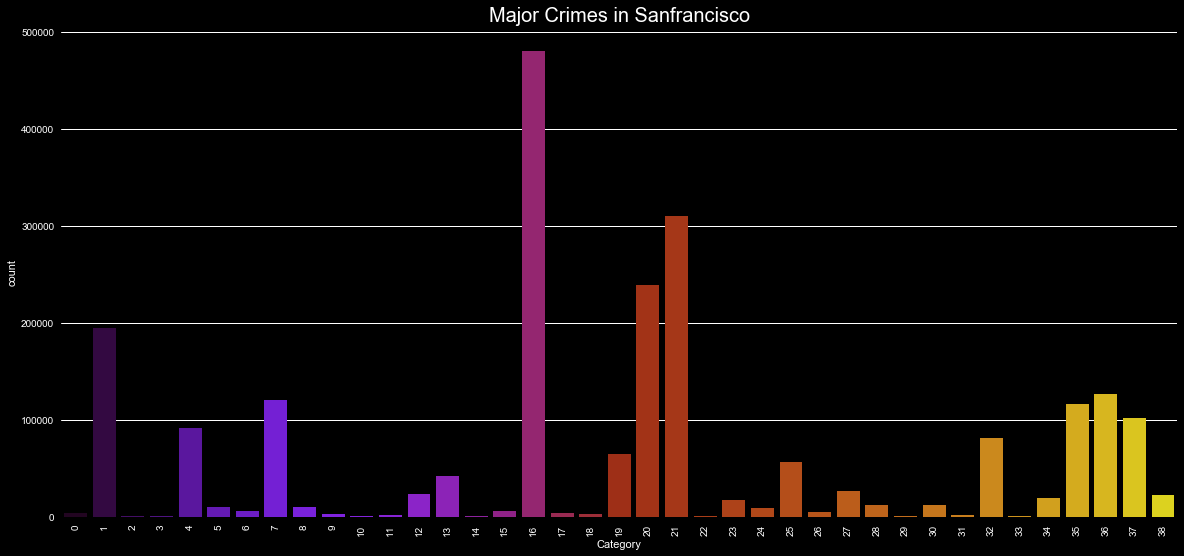

In [30]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(df['Category'], palette = 'gnuplot')
plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


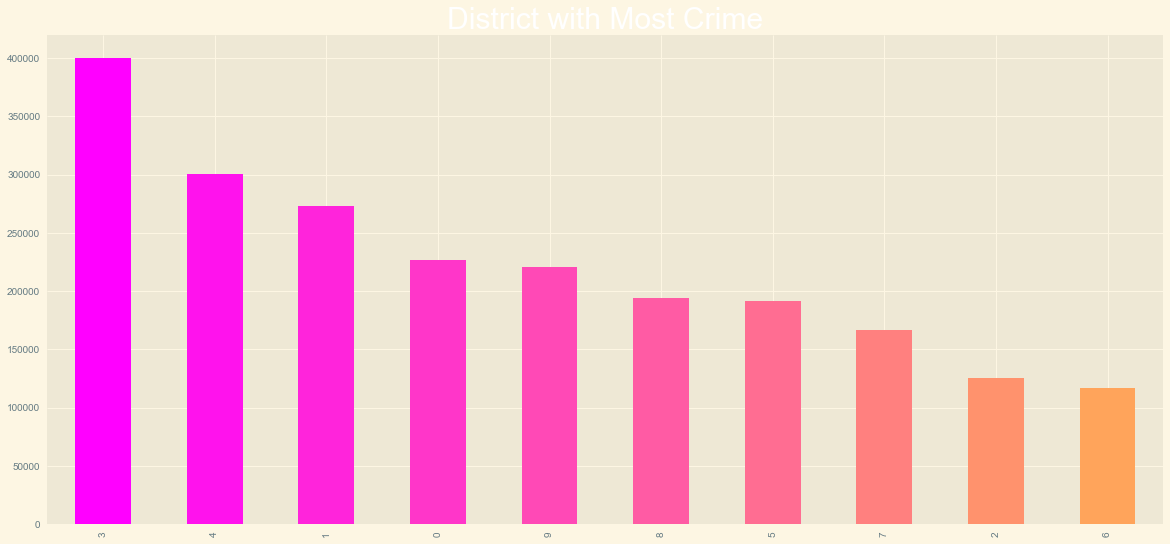

In [31]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.spring(np.linspace(0, 1, 15))
df['PdDistrict'].value_counts().plot.bar(color = color)

plt.title('District with Most Crime',fontsize = 30)
plt.xticks(rotation = 90)
plt.show()


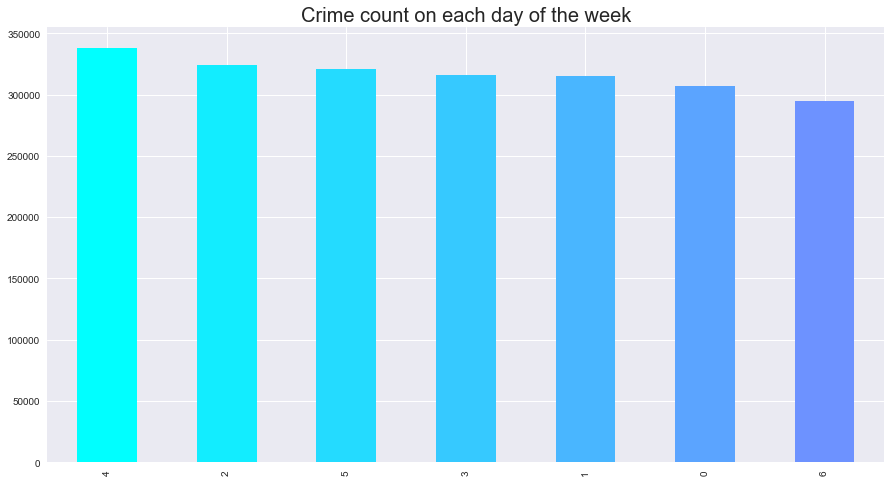

In [32]:
plt.style.use('seaborn')
color = plt.cm.cool(np.linspace(0, 1, 15))
df['DayOfWeek'].value_counts().head(15).plot.bar(color = color, figsize = (15, 8))
plt.title('Crime count on each day of the week',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


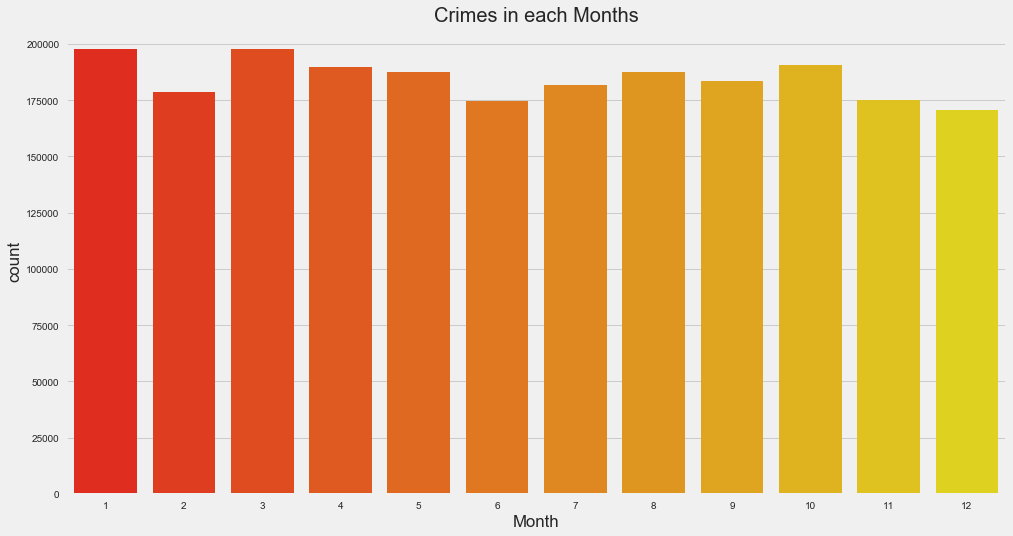

In [33]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month'] = df['Date_Time'].dt.month
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['Month'], palette = 'autumn',)
plt.title('Crimes in each Months', fontsize = 20)
plt.show()


In [34]:
'''df_Org=pd.read_csv("ORIGINAL Police_Department_Incident_Reports__Historical_2003_to_May_2018 - Copy.csv")
import warnings
warnings.filterwarnings('ignore')
color = plt.cm.twilight(np.linspace(0, 5, 100))
df_Org['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()
'''

'df_Org=pd.read_csv("ORIGINAL Police_Department_Incident_Reports__Historical_2003_to_May_2018 - Copy.csv")\nimport warnings\nwarnings.filterwarnings(\'ignore\')\ncolor = plt.cm.twilight(np.linspace(0, 5, 100))\ndf_Org[\'Time\'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))\nplt.title(\'Distribution of crime over the day\', fontsize = 20)\nplt.show()\n'

In [35]:
NOCpD = df.PdDistrict.value_counts()
print (NOCpD)

3    399786
4    300076
1    272713
0    226255
9    221000
8    194180
5    191746
7    166971
2    125479
6    116818
Name: PdDistrict, dtype: int64


In [36]:
pd.options.display.max_columns=100
def feature_engineering(data):
    data['Date'] = pd.to_datetime(data['Date_Time'].dt.date)
    data['n_days'] = (data['Date_Time'] - data['Date_Time'].min()).apply(lambda x: x.days)
    data['Day'] = data['Date_Time'].dt.day
    data['DayOfWeek'] = data['Date_Time'].dt.weekday
    data['Month'] = data['Date_Time'].dt.month
    data['Season']=data['Date_Time'].dt.month
    data['Year'] = data['Date_Time'].dt.year
    data['Hour'] = data['Date_Time'].dt.hour
    data['Minute'] = data['Date_Time'].dt.minute
    data['TP']=data['Date_Time'].dt.hour
    data['dayofyear']=data['Date_Time'].dt.dayofyear
    
    data.drop(columns=['Address'], inplace=True)
    return data
df = feature_engineering(df)

In [37]:
df.head()

Date_Time  IncidntNum  Category  Descript  DayOfWeek  PdDistrict  \
0 2011-04-15 16:00:00   110308742        19       389          4           7   
1 2009-03-26 12:28:00    90316914        37       868          3           3   
2 2013-02-15 02:00:00   130132311        27       279          4           2   
3 2008-01-15 20:13:00    80052833        21       280          1           4   
4 2007-05-26 18:10:00    70535770        27       279          5           4   

            X          Y                                    Location  \
0 -122.476328  37.719687  POINT (-122.476327815126 37.7196874952717)   
1 -122.411340  37.781271  POINT (-122.411339562557 37.7812707434494)   
2 -122.435188  37.762670  POINT (-122.435187699349 37.7626702770872)   
3 -122.421886  37.764918  POINT (-122.421886357981 37.7649178909424)   
4 -122.413935  37.751693  POINT (-122.413935404044 37.7516932889916)   

             PdId  SF Find Neighborhoods  Current Police Districts  \
0  11030874275000                   42.0                      10.0   
1   9031691463010                   32.0                       5.0   
2  13013231115200                   38.0                       3.0   
3   8005283365016                   53.0                       3.0   
4   7053577015200                   53.0                       3.0   

   Current Supervisor Districts  Analysis Neighborhoods  \
0                           8.0                    16.0   
1                          10.0                    34.0   
2                           5.0                     5.0   
3                           5.0                    20.0   
4                           2.0                    20.0   

   DELETE - Fire Prevention Districts  DELETE - Police Districts  \
0                                 1.0                        8.0   
1                                14.0                        2.0   
2                                15.0                        4.0   
3                                 8.0                        4.0   
4                                 2.0                        4.0   

   DELETE - Supervisor Districts  DELETE - Zip Codes  DELETE - Neighborhoods  \
0                            4.0                64.0                    14.0   
1                            9.0             28853.0                    34.0   
2                            5.0             28862.0                     3.0   
3                            5.0             28859.0                    19.0   
4                            7.0             28859.0                    19.0   

   DELETE - 2017 Fix It Zones  Civic Center Harm Reduction Project Boundary  \
0                         NaN                                           NaN   
1                         NaN                                           1.0   
2                         1.0                                           NaN   
3                         NaN                                           NaN   
4                         NaN                                           NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1        

In [38]:
NOCpT=df.TP.value_counts()
print (NOCpT)

18    140918
17    135481
12    132631
19    126404
16    125548
15    120190
20    115010
22    113915
0     113096
14    112078
21    109559
13    108540
23    104732
11     97620
10     95469
9      89303
8      82459
1      65182
7      55551
2      54550
3      35596
6      33494
4      25285
5      22413
Name: TP, dtype: int64


In [39]:
NOCpDOW = df.DayOfWeek.value_counts()
print (NOCpDOW)

4    337941
2    324020
5    320593
3    316156
1    315135
0    306587
6    294592
Name: DayOfWeek, dtype: int64


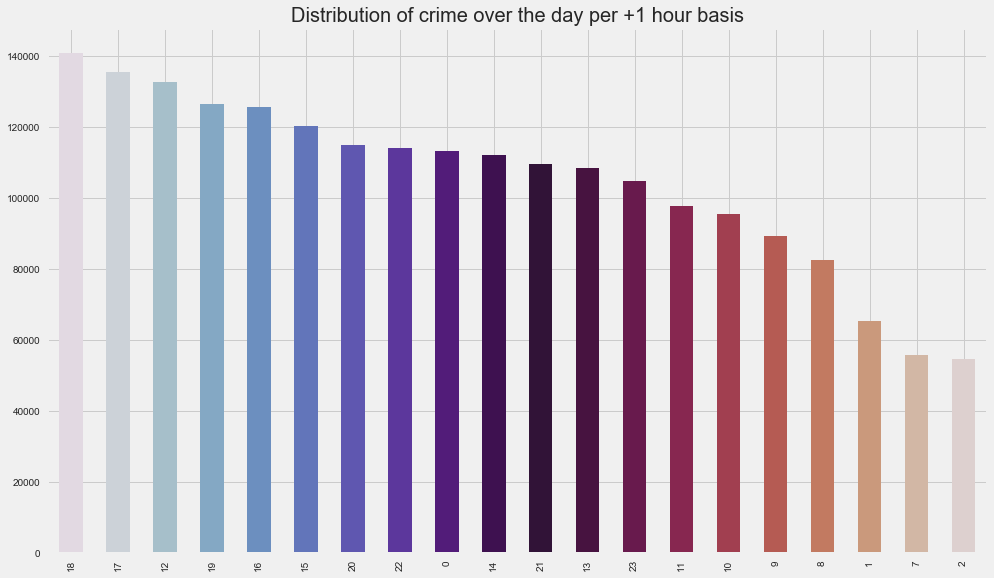

In [40]:
import warnings
warnings.filterwarnings('ignore')
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['TP'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the day per +1 hour basis', fontsize = 20)
plt.show()


In [41]:
#1=Summer
#2=Fall
#3=Winter
#4=Spring
df['Season'].replace([12,1,2],3,inplace=True)
df['Season'].replace([9,10,11],2,inplace=True)
df['Season'].replace([3,4,5],4,inplace=True)
df['Season'].replace([6,8,7],1,inplace=True)


In [42]:
df.head()

Date_Time  IncidntNum  Category  Descript  DayOfWeek  PdDistrict  \
0 2011-04-15 16:00:00   110308742        19       389          4           7   
1 2009-03-26 12:28:00    90316914        37       868          3           3   
2 2013-02-15 02:00:00   130132311        27       279          4           2   
3 2008-01-15 20:13:00    80052833        21       280          1           4   
4 2007-05-26 18:10:00    70535770        27       279          5           4   

            X          Y                                    Location  \
0 -122.476328  37.719687  POINT (-122.476327815126 37.7196874952717)   
1 -122.411340  37.781271  POINT (-122.411339562557 37.7812707434494)   
2 -122.435188  37.762670  POINT (-122.435187699349 37.7626702770872)   
3 -122.421886  37.764918  POINT (-122.421886357981 37.7649178909424)   
4 -122.413935  37.751693  POINT (-122.413935404044 37.7516932889916)   

             PdId  SF Find Neighborhoods  Current Police Districts  \
0  11030874275000                   42.0                      10.0   
1   9031691463010                   32.0                       5.0   
2  13013231115200                   38.0                       3.0   
3   8005283365016                   53.0                       3.0   
4   7053577015200                   53.0                       3.0   

   Current Supervisor Districts  Analysis Neighborhoods  \
0                           8.0                    16.0   
1                          10.0                    34.0   
2                           5.0                     5.0   
3                           5.0                    20.0   
4                           2.0                    20.0   

   DELETE - Fire Prevention Districts  DELETE - Police Districts  \
0                                 1.0                        8.0   
1                                14.0                        2.0   
2                                15.0                        4.0   
3                                 8.0                        4.0   
4                                 2.0                        4.0   

   DELETE - Supervisor Districts  DELETE - Zip Codes  DELETE - Neighborhoods  \
0                            4.0                64.0                    14.0   
1                            9.0             28853.0                    34.0   
2                            5.0             28862.0                     3.0   
3                            5.0             28859.0                    19.0   
4                            7.0             28859.0                    19.0   

   DELETE - 2017 Fix It Zones  Civic Center Harm Reduction Project Boundary  \
0                         NaN                                           NaN   
1                         NaN                                           1.0   
2                         1.0                                           NaN   
3                         NaN                                           NaN   
4                         NaN                                           NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1        

In [43]:
'''Time extracted from the day can be divided into four-hour time periods.
12 am to 4 am is identified as 1 
4 am to 8 am is identified as 2
8 am to 12 pm is identified as 3
12pm to 4 pm is identified as 4
4pm to 8 pm is identified as 5
8pm to 12 am is identified as 6  
'''
df['TP'].replace([0,1,2,3],1,inplace=True)
df['TP'].replace([4,5,6,7],2,inplace=True)
df['TP'].replace([8,9,10,11],3,inplace=True)
df['TP'].replace([12,13,14,15],4,inplace=True)
df['TP'].replace([16,17,18,19],5,inplace=True)
df['TP'].replace([20,21,22,23],6,inplace=True)


df.head()

Date_Time  IncidntNum  Category  Descript  DayOfWeek  PdDistrict  \
0 2011-04-15 16:00:00   110308742        19       389          4           7   
1 2009-03-26 12:28:00    90316914        37       868          3           3   
2 2013-02-15 02:00:00   130132311        27       279          4           2   
3 2008-01-15 20:13:00    80052833        21       280          1           4   
4 2007-05-26 18:10:00    70535770        27       279          5           4   

            X          Y                                    Location  \
0 -122.476328  37.719687  POINT (-122.476327815126 37.7196874952717)   
1 -122.411340  37.781271  POINT (-122.411339562557 37.7812707434494)   
2 -122.435188  37.762670  POINT (-122.435187699349 37.7626702770872)   
3 -122.421886  37.764918  POINT (-122.421886357981 37.7649178909424)   
4 -122.413935  37.751693  POINT (-122.413935404044 37.7516932889916)   

             PdId  SF Find Neighborhoods  Current Police Districts  \
0  11030874275000                   42.0                      10.0   
1   9031691463010                   32.0                       5.0   
2  13013231115200                   38.0                       3.0   
3   8005283365016                   53.0                       3.0   
4   7053577015200                   53.0                       3.0   

   Current Supervisor Districts  Analysis Neighborhoods  \
0                           8.0                    16.0   
1                          10.0                    34.0   
2                           5.0                     5.0   
3                           5.0                    20.0   
4                           2.0                    20.0   

   DELETE - Fire Prevention Districts  DELETE - Police Districts  \
0                                 1.0                        8.0   
1                                14.0                        2.0   
2                                15.0                        4.0   
3                                 8.0                        4.0   
4                                 2.0                        4.0   

   DELETE - Supervisor Districts  DELETE - Zip Codes  DELETE - Neighborhoods  \
0                            4.0                64.0                    14.0   
1                            9.0             28853.0                    34.0   
2                            5.0             28862.0                     3.0   
3                            5.0             28859.0                    19.0   
4                            7.0             28859.0                    19.0   

   DELETE - 2017 Fix It Zones  Civic Center Harm Reduction Project Boundary  \
0                         NaN                                           NaN   
1                         NaN                                           1.0   
2                         1.0                                           NaN   
3                         NaN                                           NaN   
4                         NaN                                           NaN   

   Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
0                             NaN                  NaN   
1                             NaN                  1.0   
2                             1.0                  5.0   
3                             NaN                  3.0   
4                             NaN                  3.0   

   Fix It Zones as of 2018-02-07  CBD, BID and GBD Boundaries as of 2017  \
0                            NaN                                     NaN   
1                            NaN                                     7.0   
2                            1.0                                     9.0   
3                            NaN                                     NaN   
4                            NaN                                     NaN   

   Areas of Vulnerability, 2016  Central Market/Tenderloin Boundary  \
0                           2.0                                 NaN   
1        

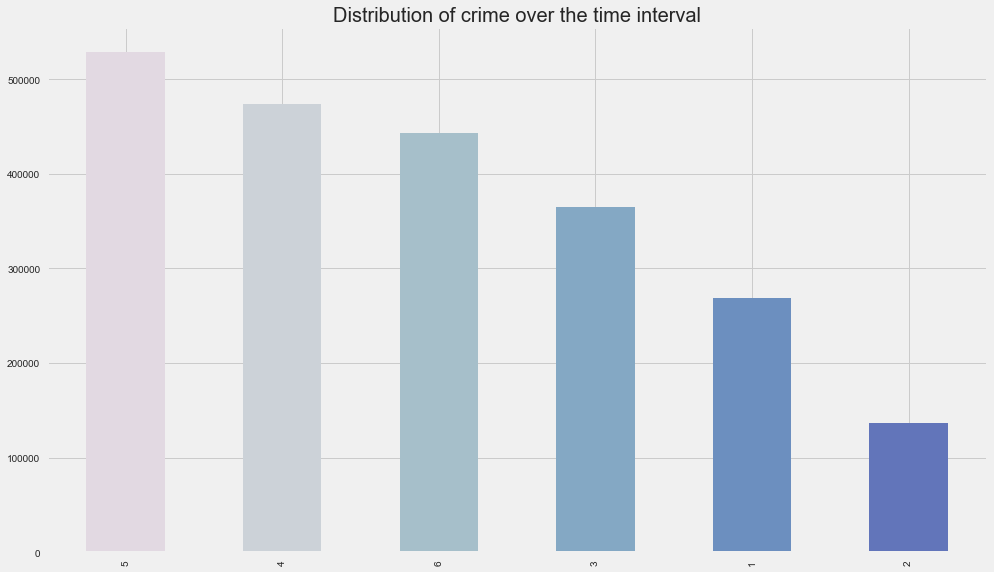

In [44]:
warnings.filterwarnings('ignore')
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['TP'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the time interval', fontsize = 20)
plt.show()


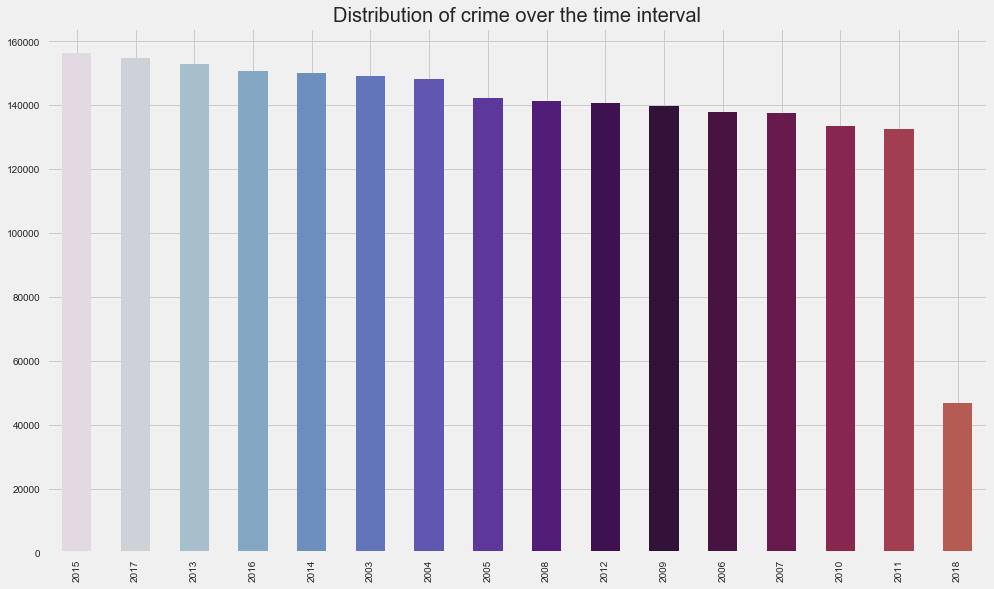

In [45]:
warnings.filterwarnings('ignore')
color = plt.cm.twilight(np.linspace(0, 5, 100))
df['Year'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of crime over the time interval', fontsize = 20)
plt.show()


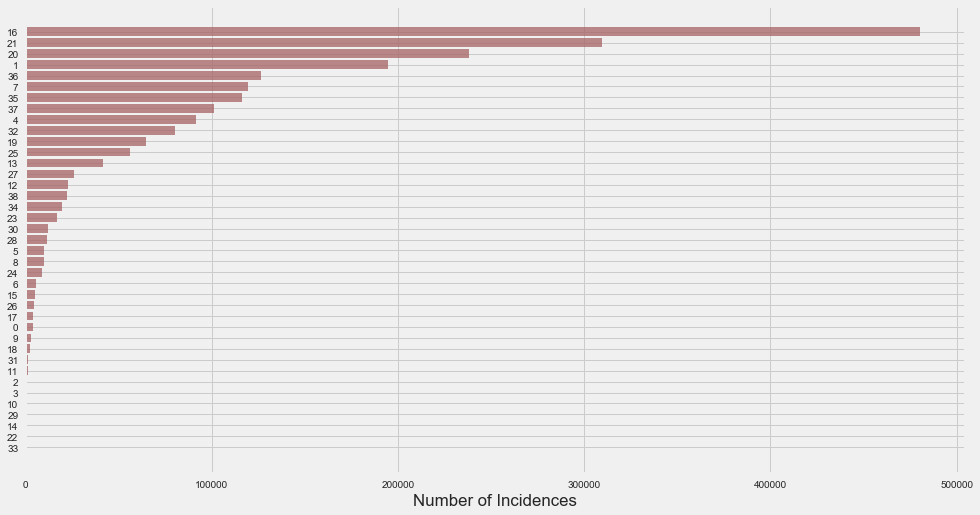

In [46]:
# Get the most common crime's occourances
most_common_cat = df['Category'].value_counts()[0:50].sort_values()
most_common_cat.values


categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Number of Incidences')
plt.show()

Text(37.6, 0.5, '')

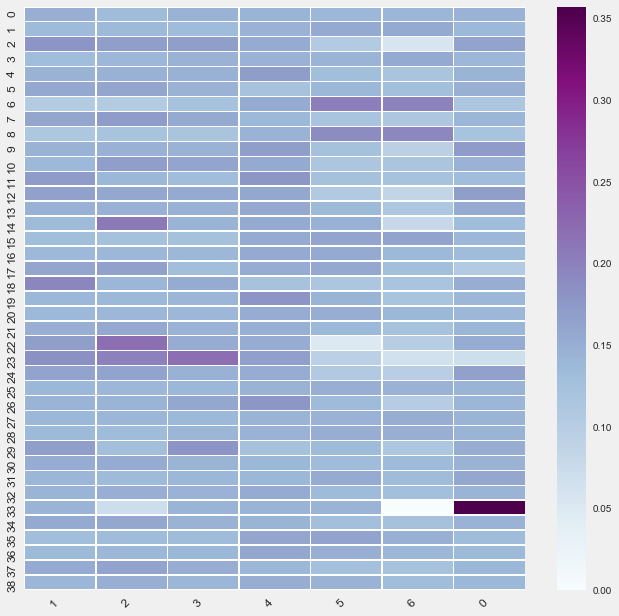

In [47]:
# Extract the most common crimes from the data
most_commons = df[df['Category'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Category'], most_commons['DayOfWeek']) 
# Calculate percentages of crimes
cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[[1,2,3,4,5,6,0]]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("")
plt.ylabel("")

In [48]:
df['Date'] = pd.to_datetime(df['Date'])
print(np.min(df['Date'] ),np.max(df['Date'] ))
df = df.sort_values('Date', ascending=True) 
df = df.dropna(how='any')

df.head()

2003-01-01 00:00:00 2018-05-15 00:00:00


Date_Time  IncidntNum  Category  Descript  DayOfWeek  \
590367  2003-01-01 16:05:00    30002559        21       863          2   
1629852 2003-01-01 13:05:00    30002076        25       664          2   
113462  2003-01-01 02:49:00    30000741        37       868          2   
2198468 2003-01-02 14:15:00    30006620        21       510          3   
801432  2003-01-02 12:09:00    30005547        21       862          3   

         PdDistrict           X          Y  \
590367            3 -122.414318  37.779944   
1629852           3 -122.411071  37.781751   
113462            3 -122.410294  37.782231   
2198468           5 -122.414312  37.779834   
801432            3 -122.414318  37.779944   

                                           Location           PdId  \
590367   POINT (-122.414317857881 37.7799444052046)  3000255915150   
1629852  POINT (-122.411071423064 37.7817511307229)  3000207603014   
113462   POINT (-122.410293519697 37.7822305869807)  3000074163010   
2198468   POINT (-122.41431222924 37.7798339183587)  3000662068020   
801432   POINT (-122.414317857881 37.7799444052046)  3000554730210   

         SF Find Neighborhoods  Current Police Districts  \
590367                    21.0                       5.0   
1629852                   20.0                       5.0   
113462                    20.0                       5.0   
2198468                   21.0                       5.0   
801432                    21.0                       5.0   

         Current Supervisor Districts  Analysis Neighborhoods  \
590367                           10.0                    36.0   
1629852                          10.0                    36.0   
113462                           10.0                    34.0   
2198468                          10.0                    36.0   
801432                           10.0                    36.0   

         DELETE - Fire Prevention Districts  DELETE - Police Districts  \
590367                                  7.0                       10.0   
1629852                                14.0                        2.0   
113462                                 14.0                        2.0   
2198468                                 7.0                       10.0   
801432                                  7.0                       10.0   

         DELETE - Supervisor Districts  DELETE - Zip Codes  \
590367                             9.0             28852.0   
1629852                            9.0             28852.0   
113462                             9.0             28853.0   
2198468                            9.0             28852.0   
801432                             9.0             28852.0   

         DELETE - Neighborhoods  DELETE - 2017 Fix It Zones  \
590367                     36.0                         3.0   
1629852                    36.0                        17.0   
113462                     34.0                        17.0   
2198468                    36.0                         3.0   
801432                     36.0                         3.0   

         Civic Center Harm Reduction Project Boundary  \
590367                                            1.0   
1629852                                           1.0   
113462                                            1.0   
2198468                                           1.0   
801432                                            1.0   

         Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
590367                              3.0                  1.0   
1629852                            18.0                  1.0   
113462                             18.0                  1.0   
2198468                             3.0                  1.0   
801432                              3.0                  1.0   

         Fix It Zones as of 2018-02-07  \
590367                             3.0   
1629852                           18.0   
113462                            18.0   
2198468                       

In [49]:
# Pick top 10 crime types of interest with highest occurance numbers
#violent = df[df.Category.isin([16,21,20,1,36,7,35,37,4,32])].copy()


In [50]:
'''# Create Arrest variable
violent['Arrest'] = np.where(violent['Resolution'].isin(['NONE', 'NOT PROSECUTED']), 0,1)

# Calculate counts
arrest_counts = violent['Category'][violent.Arrest==1].value_counts()[0:9]
total_counts = violent['Category'].value_counts()[0:9]
arrest_counts = arrest_counts/(total_counts).sort_index()
total_counts = total_counts/(total_counts).sort_index()

# Plot values
total_counts.plot.barh(color='crimson', label= 'Unsolved')
arrest_counts.plot.barh(color='mediumseagreen', label='Solved')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Proportion')
plt.show()'''

"# Create Arrest variable\nviolent['Arrest'] = np.where(violent['Resolution'].isin(['NONE', 'NOT PROSECUTED']), 0,1)\n\n# Calculate counts\narrest_counts = violent['Category'][violent.Arrest==1].value_counts()[0:9]\ntotal_counts = violent['Category'].value_counts()[0:9]\narrest_counts = arrest_counts/(total_counts).sort_index()\ntotal_counts = total_counts/(total_counts).sort_index()\n\n# Plot values\ntotal_counts.plot.barh(color='crimson', label= 'Unsolved')\narrest_counts.plot.barh(color='mediumseagreen', label='Solved')\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)\nplt.xlabel('Proportion')\nplt.show()"

In [51]:
#Add completely new column
#df['16'] = np.NaN
#df.head()

In [52]:
'''df.loc[df['Category']==21,'21']='True'
df.loc[df['Category']==20,'20']='True'
df.loc[df['Category']==16,'16']='True'
df.loc[df['Category']==1,'1']='True'
df.loc[df['Category']==36,'36']='True'
df.loc[df['Category']==7,'7']='True'
df.loc[df['Category']==35,'35']='True'
df.loc[df['Category']==37,'37']='True'
df.loc[df['Category']==4,'4']='True'
df.loc[df['Category']==32,'32']='True'

print(df)'''

"df.loc[df['Category']==21,'21']='True'\ndf.loc[df['Category']==20,'20']='True'\ndf.loc[df['Category']==16,'16']='True'\ndf.loc[df['Category']==1,'1']='True'\ndf.loc[df['Category']==36,'36']='True'\ndf.loc[df['Category']==7,'7']='True'\ndf.loc[df['Category']==35,'35']='True'\ndf.loc[df['Category']==37,'37']='True'\ndf.loc[df['Category']==4,'4']='True'\ndf.loc[df['Category']==32,'32']='True'\n\nprint(df)"

In [53]:
'''df.drop(['SF Find Neighborhoods'], axis=1)
df.drop(['Current Police Districts'], axis=1)
df.drop(['Current Supervisor Districts'], axis=1)
df.drop(['Analysis Neighborhoods'], axis=1)
df.drop(['DELETE - Fire Prevention Districts'], axis=1)
df.drop(['DELETE - Police Districts'], axis=1)
df.drop(['DELETE - Zip Codes'], axis=1)
df.drop(['DELETE - Supervisor Districts'], axis=1)
df.drop(['DELETE - Neighborhoods'], axis=1)
df.drop(['DELETE - 2017 Fix It Zones'], axis=1)
df.drop(['Civic Center Harm Reduction Project Boundary'], axis=1)
df.drop(['Fix It Zones as of 2017-11-06'], axis=1)
df.drop(['Fix It Zones as of 2018-02-07'], axis=1)
df.drop(['CBD, BID and GBD Boundaries as of 2017'], axis=1)
df.drop(['Areas of Vulnerability, 2016'], axis=1)
df.drop(['Central Market/Tenderloin Boundary'], axis=1)
df.drop(['Central Market/Tenderloin Boundary Polygon - Updated'], axis=1)
df.drop(['OWED Public Spaces'], axis=1)'''

"df.drop(['SF Find Neighborhoods'], axis=1)\ndf.drop(['Current Police Districts'], axis=1)\ndf.drop(['Current Supervisor Districts'], axis=1)\ndf.drop(['Analysis Neighborhoods'], axis=1)\ndf.drop(['DELETE - Fire Prevention Districts'], axis=1)\ndf.drop(['DELETE - Police Districts'], axis=1)\ndf.drop(['DELETE - Zip Codes'], axis=1)\ndf.drop(['DELETE - Supervisor Districts'], axis=1)\ndf.drop(['DELETE - Neighborhoods'], axis=1)\ndf.drop(['DELETE - 2017 Fix It Zones'], axis=1)\ndf.drop(['Civic Center Harm Reduction Project Boundary'], axis=1)\ndf.drop(['Fix It Zones as of 2017-11-06'], axis=1)\ndf.drop(['Fix It Zones as of 2018-02-07'], axis=1)\ndf.drop(['CBD, BID and GBD Boundaries as of 2017'], axis=1)\ndf.drop(['Areas of Vulnerability, 2016'], axis=1)\ndf.drop(['Central Market/Tenderloin Boundary'], axis=1)\ndf.drop(['Central Market/Tenderloin Boundary Polygon - Updated'], axis=1)\ndf.drop(['OWED Public Spaces'], axis=1)"

In [54]:
df.loc[df['Category']==21,'21']=1
df.loc[df['Category']==20,'20']=1
df.loc[df['Category']==16,'16']=1
df.loc[df['Category']==1,'1']=1
df.loc[df['Category']==36,'36']=1
df.loc[df['Category']==7,'7']=1
df.loc[df['Category']==35,'35']=1
df.loc[df['Category']==37,'37']=1
df.loc[df['Category']==4,'4']=1
df.loc[df['Category']==32,'32']=1


In [55]:
df.loc[df['Category']!=21,'21']=0
df.loc[df['Category']!=20,'20']=0
df.loc[df['Category']!=16,'16']=0
df.loc[df['Category']!=1,'1']=0
df.loc[df['Category']!=36,'36']=0
df.loc[df['Category']!=7,'7']=0
df.loc[df['Category']!=35,'35']=0
df.loc[df['Category']!=37,'37']=0
df.loc[df['Category']!=4,'4']=0
df.loc[df['Category']!=32,'32']=0

In [56]:
#df.drop(['SF Find Neighborhoods','Current Police Districts','Current Supervisor Districts'],'Analysis Neighborhoods','DELETE - Fire Prevention Districts','DELETE - Police Districts','DELETE - Zip Codes','DELETE - Supervisor Districts','DELETE - Neighborhoods','DELETE - 2017 Fix It Zones','Civic Center Harm Reduction Project Boundary','Fix It Zones as of 2017-11-06','Fix It Zones as of 2018-02-07','CBD, BID and GBD Boundaries as of 2017','Areas of Vulnerability, 2016','Central Market/Tenderloin Boundary','Central Market/Tenderloin Boundary Polygon - Updated','OWED Public Spaces'], axis=1)

In [57]:
df.head()

Date_Time  IncidntNum  Category  Descript  DayOfWeek  \
590367  2003-01-01 16:05:00    30002559        21       863          2   
1629852 2003-01-01 13:05:00    30002076        25       664          2   
113462  2003-01-01 02:49:00    30000741        37       868          2   
2198468 2003-01-02 14:15:00    30006620        21       510          3   
801432  2003-01-02 12:09:00    30005547        21       862          3   

         PdDistrict           X          Y  \
590367            3 -122.414318  37.779944   
1629852           3 -122.411071  37.781751   
113462            3 -122.410294  37.782231   
2198468           5 -122.414312  37.779834   
801432            3 -122.414318  37.779944   

                                           Location           PdId  \
590367   POINT (-122.414317857881 37.7799444052046)  3000255915150   
1629852  POINT (-122.411071423064 37.7817511307229)  3000207603014   
113462   POINT (-122.410293519697 37.7822305869807)  3000074163010   
2198468   POINT (-122.41431222924 37.7798339183587)  3000662068020   
801432   POINT (-122.414317857881 37.7799444052046)  3000554730210   

         SF Find Neighborhoods  Current Police Districts  \
590367                    21.0                       5.0   
1629852                   20.0                       5.0   
113462                    20.0                       5.0   
2198468                   21.0                       5.0   
801432                    21.0                       5.0   

         Current Supervisor Districts  Analysis Neighborhoods  \
590367                           10.0                    36.0   
1629852                          10.0                    36.0   
113462                           10.0                    34.0   
2198468                          10.0                    36.0   
801432                           10.0                    36.0   

         DELETE - Fire Prevention Districts  DELETE - Police Districts  \
590367                                  7.0                       10.0   
1629852                                14.0                        2.0   
113462                                 14.0                        2.0   
2198468                                 7.0                       10.0   
801432                                  7.0                       10.0   

         DELETE - Supervisor Districts  DELETE - Zip Codes  \
590367                             9.0             28852.0   
1629852                            9.0             28852.0   
113462                             9.0             28853.0   
2198468                            9.0             28852.0   
801432                             9.0             28852.0   

         DELETE - Neighborhoods  DELETE - 2017 Fix It Zones  \
590367                     36.0                         3.0   
1629852                    36.0                        17.0   
113462                     34.0                        17.0   
2198468                    36.0                         3.0   
801432                     36.0                         3.0   

         Civic Center Harm Reduction Project Boundary  \
590367                                            1.0   
1629852                                           1.0   
113462                                            1.0   
2198468                                           1.0   
801432                                            1.0   

         Fix It Zones as of 2017-11-06   DELETE - HSOC Zones  \
590367                              3.0                  1.0   
1629852                            18.0                  1.0   
113462                             18.0                  1.0   
2198468                             3.0                  1.0   
801432                              3.0                  1.0   

         Fix It Zones as of 2018-02-07  \
590367                             3.0   
1629852                           18.0   
113462                            18.0   
2198468                       

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27469 entries, 590367 to 1110234
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date_Time                                             27469 non-null  datetime64[ns]
 1   IncidntNum                                            27469 non-null  int64         
 2   Category                                              27469 non-null  int8          
 3   Descript                                              27469 non-null  int16         
 4   DayOfWeek                                             27469 non-null  int64         
 5   PdDistrict                                            27469 non-null  int8          
 6   X                                                     27469 non-null  float64       
 7   Y                                                     27469 non-null 

In [59]:
'''
#   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date_Time                                             27469 non-null  datetime64[ns]
 1   IncidntNum                                            27469 non-null  int64         
 2   Category                                              27469 non-null  int8          
 3   Descript                                              27469 non-null  int16         
 4   DayOfWeek                                             27469 non-null  int64         
 5   PdDistrict                                            27469 non-null  int8          
 6   X                                                     27469 non-null  float64       
 7   Y                                                     27469 non-null  float64       
 8   Location                                              27469 non-null  object        
 9   PdId                                                  27469 non-null  int64         
 10  SF Find Neighborhoods                                 27469 non-null  float64       
 11  Current Police Districts                              27469 non-null  float64       
 12  Current Supervisor Districts                          27469 non-null  float64       
 13  Analysis Neighborhoods                                27469 non-null  float64       
 14  DELETE - Fire Prevention Districts                    27469 non-null  float64       
 15  DELETE - Police Districts                             27469 non-null  float64       
 16  DELETE - Supervisor Districts                         27469 non-null  float64       
 17  DELETE - Zip Codes                                    27469 non-null  float64       
 18  DELETE - Neighborhoods                                27469 non-null  float64       
 19  DELETE - 2017 Fix It Zones                            27469 non-null  float64       
 20  Civic Center Harm Reduction Project Boundary          27469 non-null  float64       
 21  Fix It Zones as of 2017-11-06                         27469 non-null  float64       
 22  DELETE - HSOC Zones                                   27469 non-null  float64       
 23  Fix It Zones as of 2018-02-07                         27469 non-null  float64       
 24  CBD, BID and GBD Boundaries as of 2017                27469 non-null  float64       
 25  Areas of Vulnerability, 2016                          27469 non-null  float64       
 26  Central Market/Tenderloin Boundary                    27469 non-null  float64       
 27  Central Market/Tenderloin Boundary Polygon - Updated  27469 non-null  float64       
 28  HSOC Zones as of 2018-06-05                           27469 non-null  float64       
 29  OWED Public Spaces                                    27469 non-null  float64       
 30  Month                                                 27469 non-null  int64         
 31  Date                                                  27469 non-null  datetime64[ns]
 32  n_days                                                27469 non-null  int64         
 33  Day                                                   27469 non-null  int64         
 34  Season                                                27469 non-null  int64         
 35  Year                                                  27469 non-null  int64         
 36  Hour                                                  27469 non-null  int64         
 37  Minute                                                27469 non-null  int64         
 38  TP                                                    27469 non-null  int64         
 39  dayofyear                                             27469 non-null  int64         
 40  21                                                    27469 non-null  float64       
 41  20                                                    27469 non-null  float64       
 42  16                                                    27469 non-null  float64       
 43  1                                                     27469 non-null  float64       
 44  36                                                    27469 non-null  float64       
 45  7                                                     27469 non-null  float64       
 46  35                                                    27469 non-null  float64       
 47  37                                                    27469 non-null  float64       
 48  4                                                     27469 non-null  float64       
 49  32                                                    27469 non-null  float64       
dtyp 


dayofyear  Season  Year TP


.............
day           2068 non-null float64
dayofweek     2068 non-null float64
dayofyear     2068 non-null float64
hour          2068 non-null float64
   #month         2068 non-null float64
quarter       2068 non-null float64
   #week          2068 non-null float64
   #weekday       2068 non-null float64
   #weekofyear    2068 non-null float64
...year          2068 non-null float64
...act379        2090 non-null int64
...act13         2090 non-null int64
...act279        2090 non-null int64
...act323        2090 non-null int64
...act363        2090 non-null int64
act302        2090 non-null int64
latitude      2090 non-null float64
   #longitude     2090 non-null float64
   
   
   
'''

'\n#   Column                                                Non-Null Count  Dtype         \n---  ------                                                --------------  -----         \n 0   Date_Time                                             27469 non-null  datetime64[ns]\n 1   IncidntNum                                            27469 non-null  int64         \n 2   Category                                              27469 non-null  int8          \n 3   Descript                                              27469 non-null  int16         \n 4   DayOfWeek                                             27469 non-null  int64         \n 5   PdDistrict                                            27469 non-null  int8          \n 6   X                                                     27469 non-null  float64       \n 7   Y                                                     27469 non-null  float64       \n 8   Location                                              27469 non-null  object       

In [60]:
df['Day'] = df['Day'].astype(float)


In [61]:
df['dayofyear'] = df['dayofyear'].astype(float)
df['Season'] = df['Season'].astype(float)
df['Year'] = df['Year'].astype(float)
df['TP'] = df['TP'].astype(float)



In [62]:
df['DayOfWeek'] = df['DayOfWeek'].astype(float)


In [63]:
df['Month'] = df['Month'].astype(float)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27469 entries, 590367 to 1110234
Data columns (total 50 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date_Time                                             27469 non-null  datetime64[ns]
 1   IncidntNum                                            27469 non-null  int64         
 2   Category                                              27469 non-null  int8          
 3   Descript                                              27469 non-null  int16         
 4   DayOfWeek                                             27469 non-null  float64       
 5   PdDistrict                                            27469 non-null  int8          
 6   X                                                     27469 non-null  float64       
 7   Y                                                     27469 non-null 

In [65]:
'''
4,6,7,30,33,34,35,38,39
DayOfWeek,X,Y,Month,Day,Season,Year,TP,dayofyear
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Date_Time                                             27469 non-null  datetime64[ns]
 1   IncidntNum                                            27469 non-null  int64         
 2   Category                                              27469 non-null  int8          
 3   Descript                                              27469 non-null  int16         
 4   DayOfWeek                                             27469 non-null  float64       
 5   PdDistrict                                            27469 non-null  int8          
 6   X                                                     27469 non-null  float64       
 7   Y                                                     27469 non-null  float64       
 8   Location                                              27469 non-null  object        
 9   PdId                                                  27469 non-null  int64         
 10  SF Find Neighborhoods                                 27469 non-null  float64       
 11  Current Police Districts                              27469 non-null  float64       
 12  Current Supervisor Districts                          27469 non-null  float64       
 13  Analysis Neighborhoods                                27469 non-null  float64       
 14  DELETE - Fire Prevention Districts                    27469 non-null  float64       
 15  DELETE - Police Districts                             27469 non-null  float64       
 16  DELETE - Supervisor Districts                         27469 non-null  float64       
 17  DELETE - Zip Codes                                    27469 non-null  float64       
 18  DELETE - Neighborhoods                                27469 non-null  float64       
 19  DELETE - 2017 Fix It Zones                            27469 non-null  float64       
 20  Civic Center Harm Reduction Project Boundary          27469 non-null  float64       
 21  Fix It Zones as of 2017-11-06                         27469 non-null  float64       
 22  DELETE - HSOC Zones                                   27469 non-null  float64       
 23  Fix It Zones as of 2018-02-07                         27469 non-null  float64       
 24  CBD, BID and GBD Boundaries as of 2017                27469 non-null  float64       
 25  Areas of Vulnerability, 2016                          27469 non-null  float64       
 26  Central Market/Tenderloin Boundary                    27469 non-null  float64       
 27  Central Market/Tenderloin Boundary Polygon - Updated  27469 non-null  float64       
 28  HSOC Zones as of 2018-06-05                           27469 non-null  float64       
 29  OWED Public Spaces                                    27469 non-null  float64       
 30  Month                                                 27469 non-null  float64       
 31  Date                                                  27469 non-null  datetime64[ns]
 32  n_days                                                27469 non-null  int64         
 33  Day                                                   27469 non-null  float64       
 34  Season                                                27469 non-null  float64       
 35  Year                                                  27469 non-null  float64       
 36  Hour                                                  27469 non-null  int64         
 37  Minute                                                27469 non-null  int64         
 38  TP                                                    27469 non-null  float64       
 39  dayofyear                                             27469 non-null  float64       
 40  21                                                    27469 non-null  float64       
 41  20                                                    27469 non-null  float64       
 42  16                                                    27469 non-null  float64       
 43  1                                                     27469 non-null  float64       
 44  36                                                    27469 non-null  float64       
 45  7                                                     27469 non-null  float64       
 46  35                                                    27469 non-null  float64       
 47  37                                                    27469 non-null  float64       
 48  4                                                     27469 non-null  float64       
 49  32                                                    27469 non-null  float64       
dtypes: datetime64[ns](2), float64(39), int16(1), int64(5), int8(2), object(1)
'''

"\n<class 'pandas.core.frame.DataFrame'>\nInt64Index: 27469 entries, 590367 to 1110234\nData columns (total 50 columns):\n #   Column                                                Non-Null Count  Dtype         \n---  ------                                                --------------  -----         \n 0   Date_Time                                             27469 non-null  datetime64[ns]\n 1   IncidntNum                                            27469 non-null  int64         \n 2   Category                                              27469 non-null  int8          \n 3   Descript                                              27469 non-null  int16         \n 4   DayOfWeek                                             27469 non-null  float64       \n 5   PdDistrict                                            27469 non-null  int8          \n 6   X                                                     27469 non-null  float64       \n 7   Y                                                     

In [66]:
X=df.iloc[:,[4,6,7,30,33,34,35,38,39]].values

In [67]:
print (X)

[[ 2.00000000e+00 -1.22414318e+02  3.77799444e+01 ...  2.00300000e+03
   5.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00 -1.22411071e+02  3.77817511e+01 ...  2.00300000e+03
   4.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00 -1.22410294e+02  3.77822306e+01 ...  2.00300000e+03
   1.00000000e+00  1.00000000e+00]
 ...
 [ 6.00000000e+00 -1.22414744e+02  3.77787193e+01 ...  2.01800000e+03
   3.00000000e+00  1.33000000e+02]
 [ 0.00000000e+00 -1.22410294e+02  3.77822306e+01 ...  2.01800000e+03
   1.00000000e+00  1.34000000e+02]
 [ 0.00000000e+00 -1.22410294e+02  3.77822306e+01 ...  2.01800000e+03
   1.00000000e+00  1.34000000e+02]]


In [68]:
y=df.iloc[:,[40,41,42,43,44,45,46,47,48,49]].values

In [69]:
print (y)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

In [71]:
#Creating & Training KNN Model
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.multioutput import MultiOutputClassifier
knn = KNeighborsClassifier(n_neighbors=10)
#classifier = MultiOutputClassifier(knn, n_jobs=-1)
#classifier.fit(X,y)

knn.fit(X_train,y_train)
#classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [72]:
knn.score(X_test,y_test)
#classifier.score(X_test,y_test)

0.1549569227035554

In [73]:
knn.score(X_train,y_train)
#classifier.score(X_train,y_train)

0.17692947784480964

In [74]:
#Elbow Method For optimum value of K

In [75]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

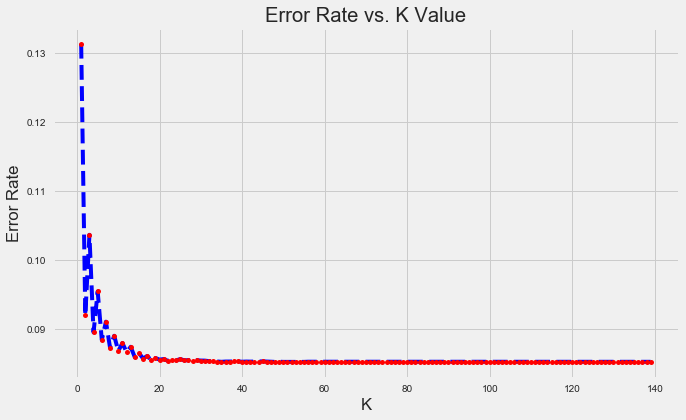

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,140),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
#Creating & Training Decision Tree Model

In [78]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)




In [79]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=500, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=300, splitter='best')

In [80]:
y_pred=dtree.predict(X_test)

In [81]:
dtree.score(X_test,y_test)

0.22812765441087246

In [82]:
dtree.score(X_train,y_train)

0.7356979405034325

In [83]:
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [84]:
treefeatures=dtree.feature_importances_
indices = np.argsort(treefeatures)


In [85]:
treefeatures

array([0.14226204, 0.015498  , 0.03236189, 0.05663792, 0.22261893,
       0.02121618, 0.11998746, 0.13322086, 0.25619672])

In [86]:
features = df.iloc[:,[4,6,7,30,33,34,35,38,39]]

KeyError: "None of [Int64Index([1, 5, 2, 3, 6, 7, 0, 4, 8], dtype='int64')] are in the [columns]"

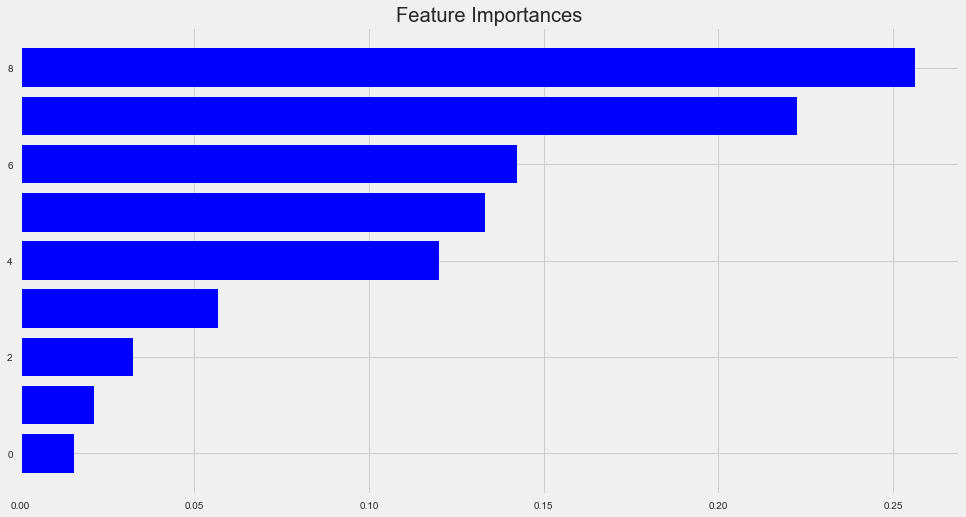

In [87]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
#Tree Visualization

In [90]:
feature_names=['DayOfWeek','X','Y','Month','Day','Season','Year','TP','dayofyear']

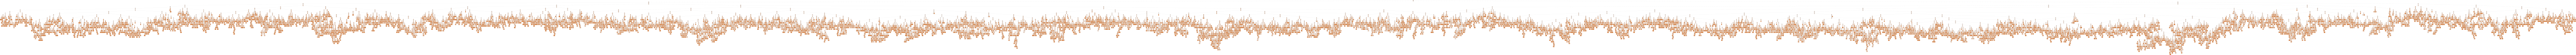

In [91]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + r"C:\Users\sohan\Desktop\New folder/"
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [92]:
#Creating & Training Random Tree Model


In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
y_pred=rfc.predict(X_test)

In [95]:
rfc.score(X_test,y_test)

0.2289770658900619

In [96]:
rfc.score(X_train,y_train)

0.7599334304139796

In [97]:
om=rfc.feature_importances_
indices = np.argsort(om)


In [98]:
om

array([0.1258462 , 0.02894973, 0.03528203, 0.08844068, 0.20461542,
       0.02688898, 0.14726617, 0.11671959, 0.2259912 ])

In [99]:
features = df.columns

Text(0.5, 0, 'Relative Importance')

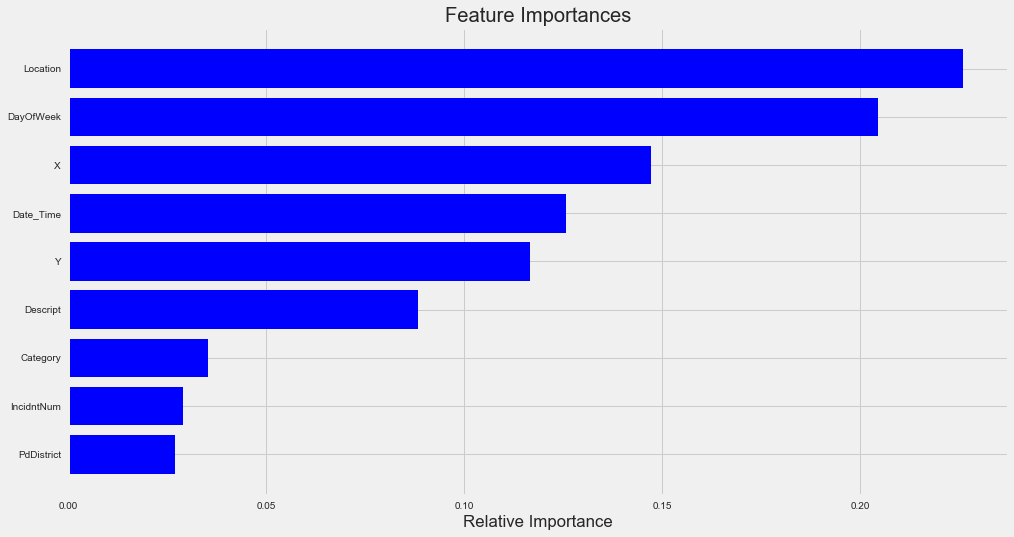

In [100]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [101]:
!ipython nbconvert --to slides CrimePrediction.ipynb

This application is used to convert notebook files (*.ipynb) to various other
formats.


Options

-------



Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.


--debug

    set log level to logging.DEBUG (maximize logging output)

--generate-config

    generate default config file

-y

    Answer yes to any questions instead of prompting.

--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in 

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] WARNING | pattern 'CrimePrediction.ipynb' matched no files



--clear-output

    Clear output of current file and save in place, 
    overwriting the existing notebook.

--no-prompt

    Exclude input and output prompts from converted document.

--no-input

    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--log-level=<Enum> (Application.log_level)

    Default: 30

    Choices: (0, 10, 20, 30, 40, 50, 'DEBUG', 'INFO', 'WARN', 'ERROR', 'CRITICAL')

    Set the log level by value or name.

--config=<Unicode> (JupyterApp.config_file)

    Default: ''

    Full path of a config file.

--to=<Unicode> (NbConvertApp.export_format)

    Default: 'html'

    The export format to be used, either one of the built-in formats

    ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf',

    'python', 'rst', 'script', 'slides'] or a dotted object name that represents

    the import path for an `Exporter` class

--template=<Unicode> (TemplateExporter.template_file)

 

In [102]:
!ipython nbconvert --to pdf CrimePrediction.ipynb



    Default: 'FilesWriter'

    Writer class used to write the  results of the conversion

--post=<DottedOrNone> (NbConvertApp.postprocessor_class)

    Default: ''

    PostProcessor class used to write the results of the conversion

--output=<Unicode> (NbConvertApp.output_base)

    Default: ''

    overwrite base name use for output files. can only be used when converting

    one notebook at a time.

--output-dir=<Unicode> (FilesWriter.build_directory)

    Default: ''

    Directory to write output(s) to. Defaults to output to the directory of each

    notebook. To recover previous default behaviour (outputting to the current

    working directory) use . as the flag value.

--reveal-prefix=<Unicode> (SlidesExporter.reveal_url_prefix)

    Default: ''

    The URL prefix for reveal.js (version 3.x). This defaults to the reveal CDN,

    but can be any url pointing to a copy  of reveal.js.

    For speaker notes to work, this must be a relative path to a local  copy of

    reve

[TerminalIPythonApp] WARNING | Subcommand `ipython nbconvert` is deprecated and will be removed in future versions.
[TerminalIPythonApp] WARNING | You likely want to use `jupyter nbconvert` in the future
[NbConvertApp] WARNING | pattern 'CrimePrediction.ipynb' matched no files



--execute

    Execute the notebook prior to export.

--allow-errors

    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.

--stdin

    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'

--stdout

    Write notebook output to stdout instead of files.

--inplace

    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)

--clear-output

    Clear output of current file and save in place, 
    overwriting the existing notebook.

--no-prompt

    Exclude input and output prompts from converted document.

--no-input

    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--log-level=<Enum> (Application.log_level)

    Default: 30


In [ ]:
#On going with ARIMA Model